# Сборный проект №1. Анализ данных по компьютерным играм

**Описание проекта и цель исследования**

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности на основе имеющихся данных до 2016 г. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании, например, на следующий год.

**Описание данных**

Перед нами данные об играх из открытых источников до 2016 года: 

* Name — название игры

* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Ход исследования**

1. Загрузка данных и изучение общей информации из предоставленного датасета.
2. Предообработка данных: обработка пропущенных значений, корректировка типа данных, дубликатов и других аномалий, добавление данных о суммарных продажах во всех регионах.
3. Иследовательский анализ данных: выявление зависимости продаж игр по платформам, зависимости продаж от отзывов пользователей и критиков, зависимости продаж по жанрам.
4. Составление портрета пользователя каждого региона.
5. Проверка гипотез:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
6. Общий вывод: резюмирование полученных результатов, формулирование ключевых выводов и рекомендаций
    

## Загрузка данных и изучение общей информации

Импортируем все необходимые библиотеки для дальнейшей работы с данными:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
from math import sqrt
from scipy.stats import binom, norm

Считаем CSV-файл с данными с помощью библиотеки pandas и сохраним их в датафрейм:

In [2]:
data = pd.read_csv('C:/Users/PolinaNote/datasets/games.csv')

Выведем первые строки датафреймов и общую информацию:

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Изучив общую информацию о датафрейме, сразу можно увидеть несколько поводов для обработки данных:

* верхний регистр в названиях столбцов;
* наличие пропусков в столбцах name, year_of_release, genre, critic_score, user_score, rating;
* года в столбце year_of_release с 1 знаком после запятой, т.к. тип данных float64 (он не нужен)

## Предобработка данных

### Переименование столбцов

Приведем к нижнему регистру все названия столбцов.

In [5]:
data = data.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release',
                            'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales',
                            'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score',
                            'Rating': 'rating'})
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразование типов данных и обработка пропусков

Заменим тип данных строки в столбце user_score на числовой. При запуске года data['user_score'] = pd.to_numeric(data['user_score']) возникает ошибка, которая говорит о том, что в столбце есть некорректные значения, у нас это "tbd" и их невозможно преобразовать в числовой тип данных. tbd можно расшифровать как to be determined (будет определено) или to be discussed (выносится на обсуждение) - т.е. значений нет, поэтому заменим их при изменении типа данных на Nan.

In [6]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Посмотрим на количество пропусков в датафрейме:

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [8]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,54.600000


Пропущенных значений в столбцах name и genre всего 2. Посмотрим на доли пропущенных значений в столбце year_of_release - сейчас значения в нем с 1 знаком после запятой, т.к. тип данных float64 (он не нужен, заменим далее на int64).

In [9]:
data['year_of_release'].isna().sum()/len(data['year_of_release'])*100

1.609332934489979

1.6% пропусков от всего датафрейма, удалим строки с пропусками в столбце year_of_release, а также name и genre:

In [10]:
data = data.dropna(subset=['name', 'genre', 'year_of_release']).reset_index(drop=True)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Пропуски частично подчистили, заменим тип данных на целочисленные значения в year_of_release:

In [11]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


Остается много пропусков в столбцах critic_score, user_score, rating. Столбец rating содержит категориальные данные, поэтому заменим пропуски в нем, на "unknown":

In [13]:
data['rating'] = data['rating'].fillna('unknown')

Пропуски в столбцах critic_score и user_score заполним так называемыми "заглушками" - нереальным значением, например, отрицательным (-1), чтобы мы могли проводить в дальнейшем операции с данными, нам нужно избавиться от Nan значений.

In [14]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Обработка дубликатов

Проверим строки-дубликаты (есть ли они):

In [15]:
data.duplicated().sum()

0

Явных дубликатов нет, проверим неявные дубликаты в столбце с названиями игр и платформами, и также по году выпуску, т.к. разные года выпуска одной игры могут значить, что игру перевыпускали и значит ее нужно считать отдельно:

In [16]:
data[data.duplicated(subset=['name','platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Оставим из этих 2 строк первую, т.к. по ней заполнено больше столбцов, а те, которые заполнены - совпадают по значениям с дубликатом.

In [17]:
data = data.drop_duplicates(subset=['name','platform', 'year_of_release'], keep='first').reset_index(drop=True)

И еще раз проверим, что дубликата больше нет:

In [18]:
data[data.duplicated(subset=['name','platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### Подсчет суммарных продаж во всех регионах

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [19]:
# создаем функцию для подсчета суммы продаж во всех регионах
def sales(row):
    return row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']
# добавляем новый столбец с помощью этой функции
data['total_sales'] = data.apply(sales, axis=1)

In [20]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


Столбец появился, тут все корректно.

Итак, во 2 шаге проведена предообработка данных. Во-первых, наименования столбцов приведены к нижнему регистру. Во-вторых, обработаны пропуски в данных подходящими методами и изменены некорректные типы данных в столбцах. Найден и удален 1 неявный дубликат. А также добавлен новый столбец с суммарными продажами во всех регионах.

Можем приступить к анализу данных.

## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы.

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Создадим график с распределением количества вышедших игр по годам. Для этого создадим сводную таблицу и по ней строим график.

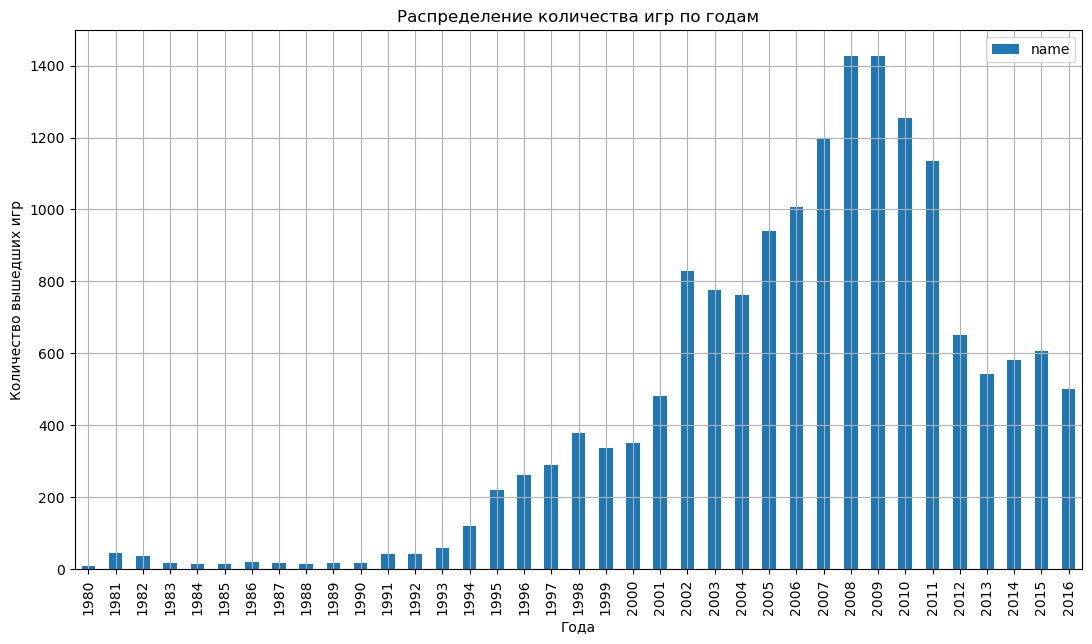

In [21]:
(
    data
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar', figsize=(13,7), grid=True)
)
plt.xlabel('Года')
plt.ylabel('Количество вышедших игр')
plt.title('Распределение количества игр по годам')
plt.show()

Видим, что пик количества выхода игр приходится на 2008-2009 года, плавное нарастание заметно с 1992 года с некоторыми резкими скачками вверх (1998, 2002 года). И также заметно довольно резкий спад выхода игр в 2012 году. Т.к. нашей целью является определение рекламных компаний на следующий год, стоит учитывать последние года, более актуальные для анализа. Например, с 2012 или 2013 - именно начиная с этих годов, прослеживается стабилизация количества вышедших игр.

### Как менялись продажи по платформам.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Построим сводную таблицу и график с группировкой по платформам и значениями их продаж, отсортируем по убыванию для наглядности графика.

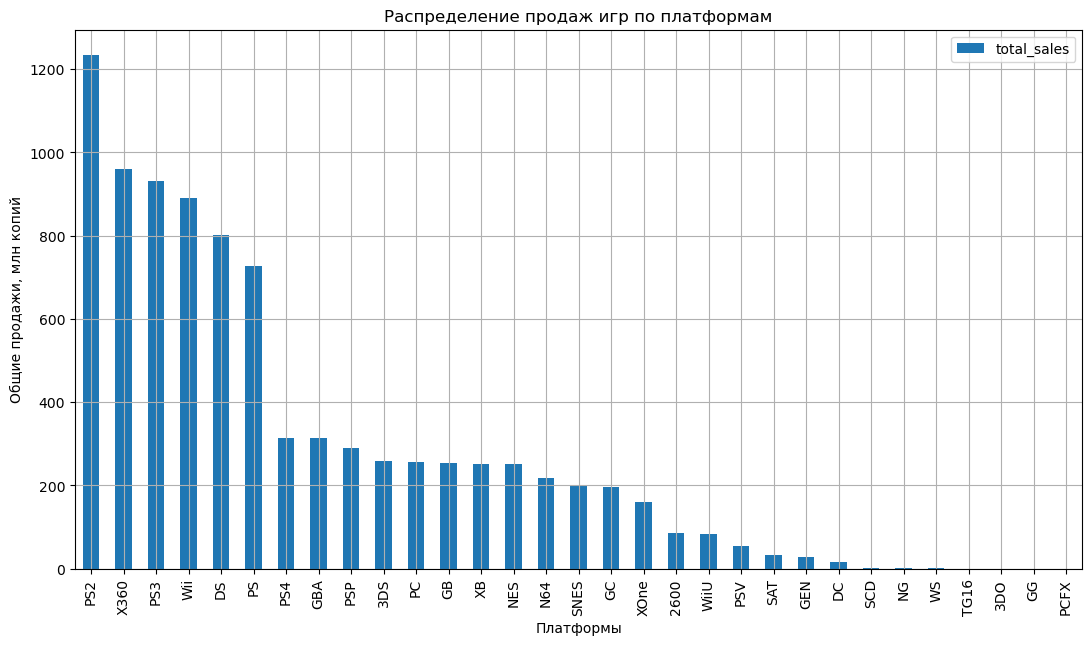

In [22]:
(
    data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar', figsize=(13,7), grid=True)
)
plt.xlabel('Платформы')
plt.ylabel('Общие продажи, млн копий')
plt.title('Распределение продаж игр по платформам')
plt.show()

По графику видно явную шестерку лидеров продаж - сохраним эти данные в новую таблицу и выведем на экран  

In [23]:
top6 = (
    data.
    pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .head(6)
    .reset_index()
)
top6

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58


Для построения распределения продаж топ6-платформ сделаем срез по ним по нашему датафрейму и затем построим распределение:

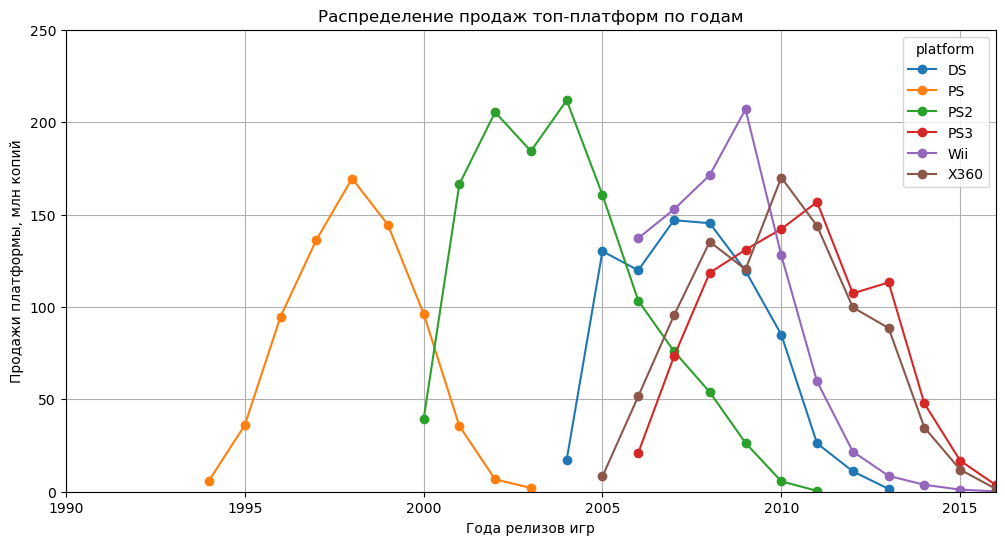

In [24]:
top6_data = data.query('platform in ["PS2", "X360", "PS3", "Wii", "DS", "PS"]')
(
    top6_data
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(kind='line', style='o-', grid=True, figsize=(12,6))
)
plt.xlabel('Года релизов игр')
plt.ylabel('Продажи платформы, млн копий')
plt.xlim(1990,2016)
plt.ylim(0,250)
plt.title('Распределение продаж топ-платформ по годам')
plt.show()

Средняя продолжительность жизни платформы по полученному графику из топ-платформ 9-11 лет. Пик продаж у платформ приходится примерно на середину их жизни или немного раньше середины.

### Определение актуального периода для дальнейшего анализа данных

Ссылаясь на полученнные результаты по п.3.1 и 3.2 и т.к. нашей целью является определение рекламных компаний на 2017 год, стоит учитывать последние года, более актуальные для анализа. Например, с 2012 или 2013 - также именно начиная с этих годов, прослеживается стабилизация количества вышедших игр. Оставлю для дальнейшего анализа данные с 2013 года - 4х лет будет достаточно.

Итак, для дальнейшей работы нам необходимо создать новый датафрейм с отфильтрованными данными с 2013 года:

In [25]:
filter_data = data.query('year_of_release >= 2013').reset_index(drop=True)
filter_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,unknown,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


### Какие платформы лидируют по продажам, растут или падают?

Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

По аналогии с п. 3.2 построим график с группировкой по платформам и значениями их продаж, отсортируем по убыванию для наглядности графика.

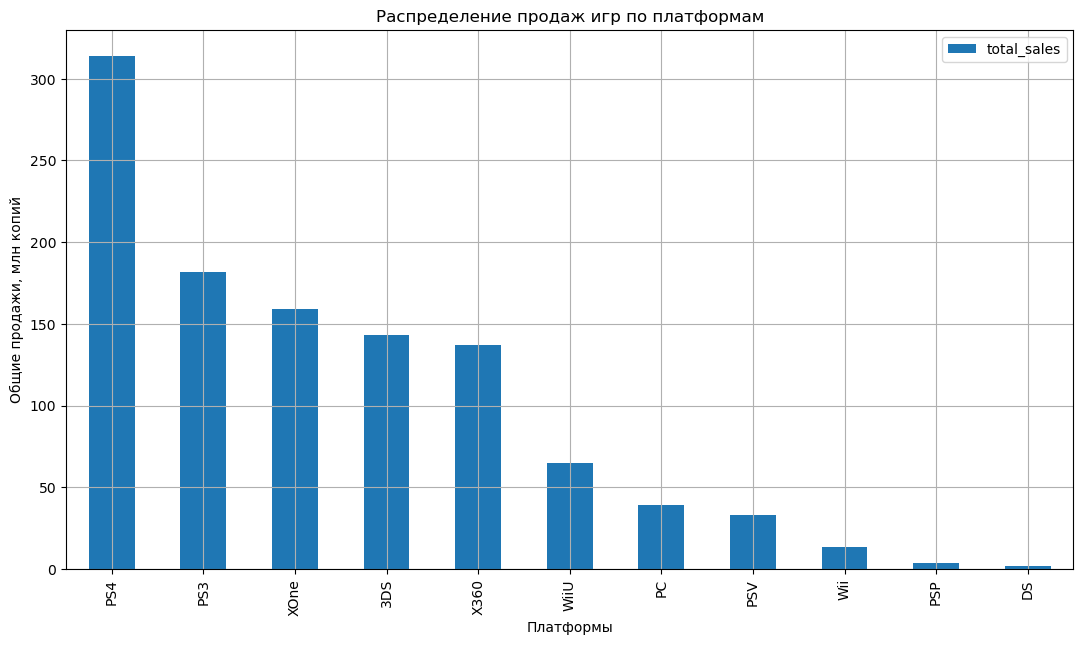

In [26]:
(
    filter_data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar', figsize=(13,7), grid=True)
)
plt.xlabel('Платформы')
plt.ylabel('Общие продажи, млн копий')
plt.title('Распределение продаж игр по платформам')
plt.show()

Явный лидер по продажам это платформа PS4, далее идет четверка с более плавным оставанием друг от друга: PS3, XOne, 3DS, X360.
Построим распределение продаж платформ по годам и посмотрим на развитие продаж этих и других платформ.

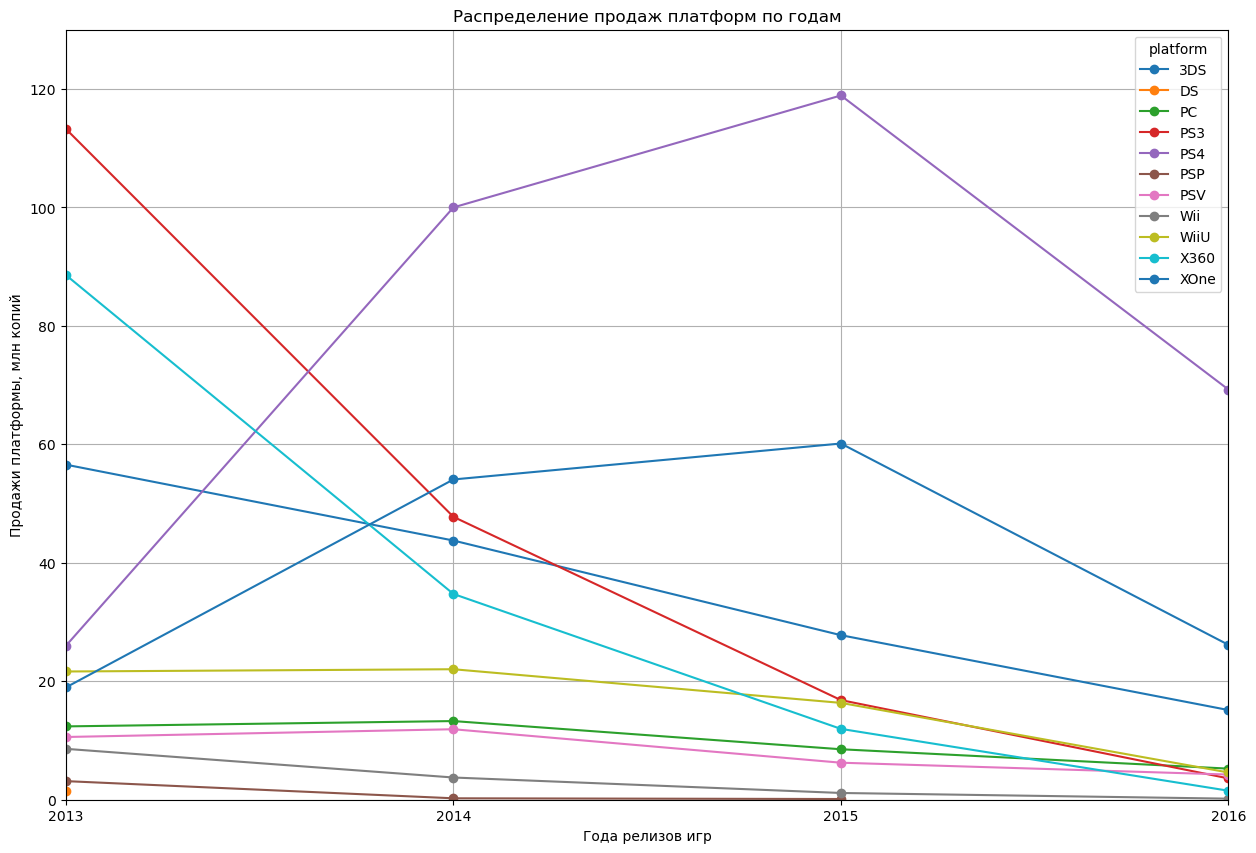

In [27]:
(
    filter_data
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(kind='line', style='o-', grid=True, figsize=(15,10))
)
plt.xlabel('Года релизов игр')
plt.ylabel('Продажи платформы, млн копий')
plt.xlim(2013,2016)
plt.ylim(0,130)
plt.xticks(np.arange(2013, 2016.1, 1))
plt.title('Распределение продаж платформ по годам')
plt.show()

По этому графику можно точно сказать, что по всем существующим платформам роста продаж нет, начиная с 2015 года. Это логично, т.к. пик продаж (как говорилось ранее) прошел в середине "жизни" платформы или в ее начале, далее будет наблюдаться спад. Также можно отметить, что при появлении новой платформы от одной компании продажи растут, в то время как ее прошлая платформа имеет все меньше продаж, что тоже логично (например, PS4 и PS3, или XOne и X360). Поэтому стоит выбрать потенциально-прибыльные платформы по количеству общих продаж (по первому графику).

Итак, в результате построения графиков можно выделить 5 потенциально-прибыльных платформ: PS4, PS3, XOne, 3DS, X360. Сохраню фильтр по платформам в новый датафрейм.

In [28]:
filter_data_platforms = filter_data.query('platform in ["PS4", "PS3", "XOne", "3DS", "X360"]').reset_index(drop=True)

### Глобальные продажи игр в разбивке по платформам

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

Сначала построю ящик с усами с разбивкой по всем платформам:

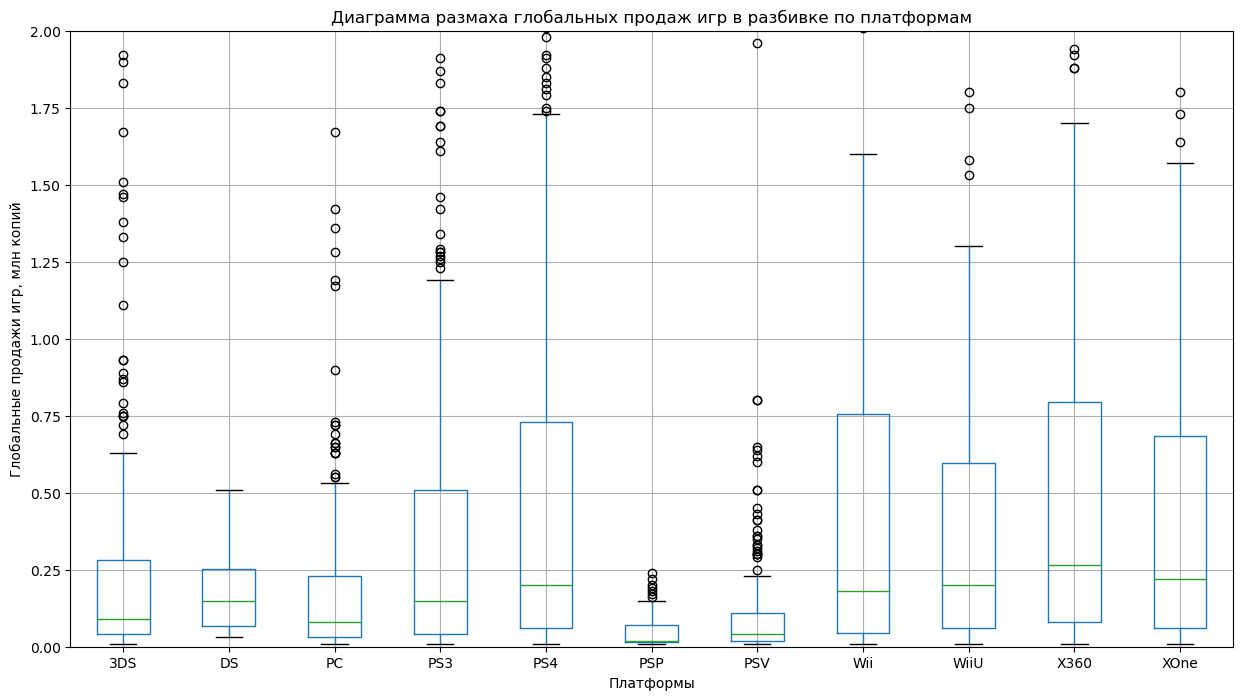

In [29]:
(
    filter_data
    .pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')
    .boxplot(figsize=(15,8))
)
plt.ylim(0, 2)
plt.xlabel('Платформы')
plt.ylabel('Глобальные продажи игр, млн копий')
plt.title('Диаграмма размаха глобальных продаж игр в разбивке по платформам')
plt.show()

Разница в продажах отличается. Имеются очень популярные игры, которые продаются много раз, таковых практически единицы (точки на диаграмме за "усом"). Ну и посмотрим на ящик с усами по потенциально-прибыльными для нас платформам из п. 3.4:

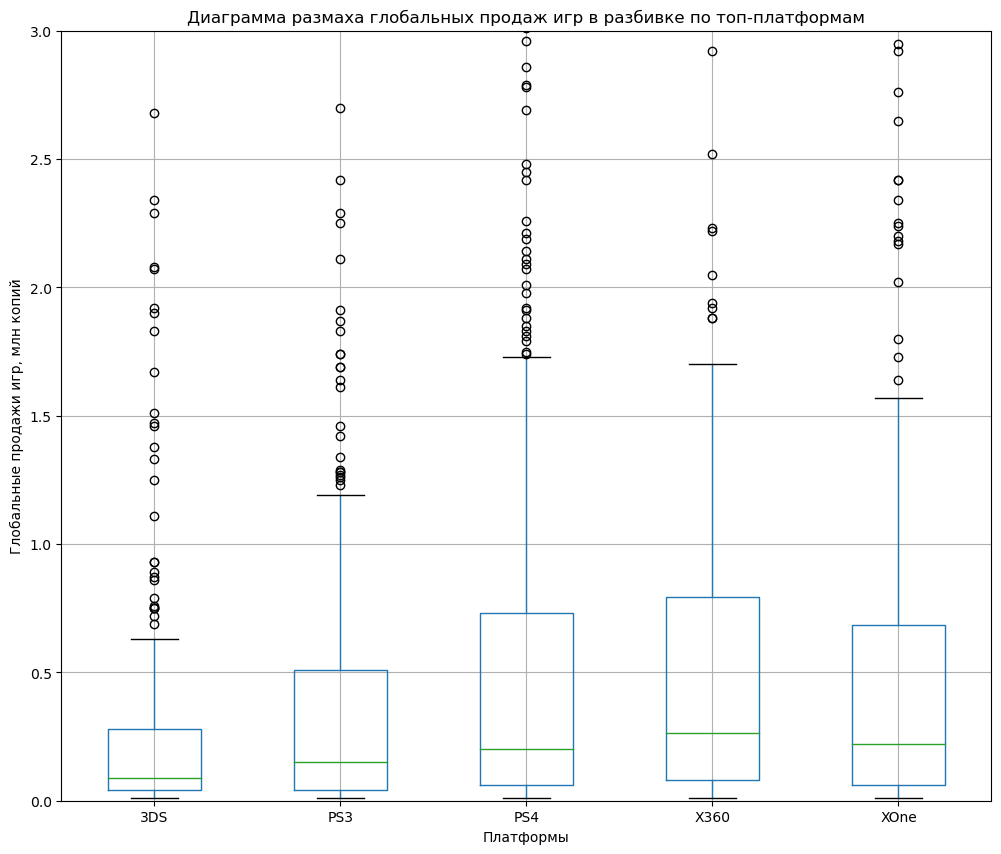

In [30]:
(
    filter_data_platforms
    .pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')
    .boxplot(figsize=(12,10))
)
plt.ylim(0, 3)
plt.xlabel('Платформы')
plt.ylabel('Глобальные продажи игр, млн копий')
plt.title('Диаграмма размаха глобальных продаж игр в разбивке по топ-платформам')
plt.show()

Проверим описание продаж для каждой выбранной нами потенциально-прибыльной платформе:  **PS4, PS3, XOne, 3DS, X360**

In [31]:
ps4 = filter_data.query('platform=="PS4"')
ps4['total_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

По **PS4** 75% всех игр продано в количестве 0.73 млн копий

In [32]:
ps3 = filter_data.query('platform=="PS3"')
ps3['total_sales'].describe()

count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: total_sales, dtype: float64

По **PS3** 75% всех игр продано в количестве 0.51 млн копий

In [33]:
xone = filter_data.query('platform=="XOne"')
xone['total_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

По **XOne** 75% всех игр продано в количестве 0.68 млн копий

In [34]:
x360 = filter_data.query('platform=="X360"')
x360['total_sales'].describe()

count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: total_sales, dtype: float64

По **X360** 75% всех игр продано в количестве 0.79 млн копий

In [35]:
ds = filter_data.query('platform=="3DS"')
ds['total_sales'].describe()

count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: total_sales, dtype: float64

По **3DS** 75% всех игр продано в количестве 0.28 млн копий

Интересно, что платформа X360 выигрывает по продажам, если говорить о медиане продаж (50% игр) и продажах 75% игр. Но на PS4 есть довольно много игр, продающихся очень много раз, которые лежат за пределами "ящика с усами" и поэтому суммарные продажи у этой платформы больше.

### Зависимость продаж топ-платформ от оценок пользователей и критиков

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы. Соотнесем выводы с продажами игр на других платформах.

Напомню, наш список топ-платформ "PS4", "PS3", "XOne", "3DS", "X360" и наш датафрейм по ним:

In [36]:
filter_data_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,unknown,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


В оценках пользователей и критиков мы проставили "заглушки" там, где оценок не было (заменили на -1). Это нужно учесть - сделать срез без этих значений.

#### Зависимость продаж от оценок критиков и пользователей платформы PS4:

**Проверим зависимость продаж этой платформы от оценки критиков.**

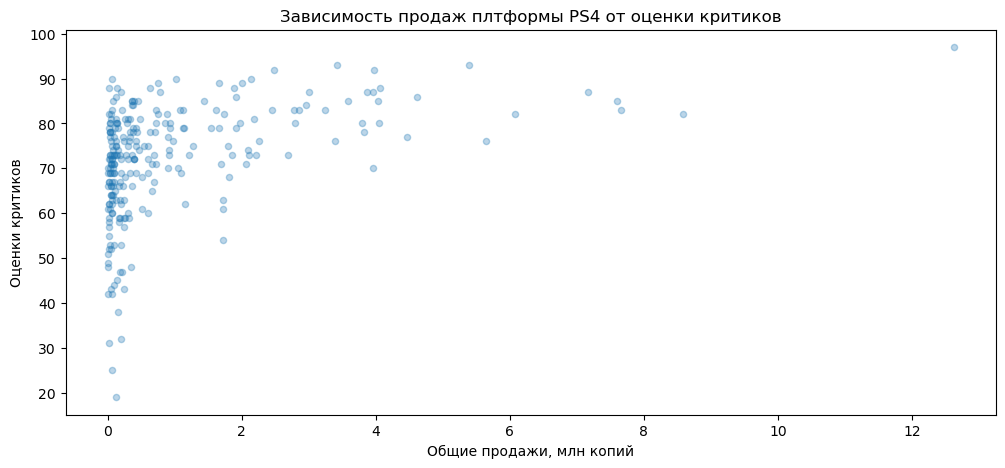

In [37]:
#Построим диаграмму рассеивания со срезом по платформе PS4 и оценке критиков без заглушек:
(
    filter_data_platforms
    .query('critic_score>=0 and platform=="PS4"')
    .plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3, figsize=(12,5)) 
)
plt.xlabel('Общие продажи, млн копий')
plt.ylabel('Оценки критиков')
plt.title('Зависимость продаж плтформы PS4 от оценки критиков')
plt.show()

По графику видна положительная корреляция, но она не сильна. Посчитаем ее:

In [38]:
(
    filter_data_platforms.query('critic_score>=0 and platform=="PS4"')['total_sales']
    .corr(filter_data_platforms.query('critic_score>=0 and platform=="PS4"')['critic_score'])
)

0.406567902061781

Корреляция равна 0.4. Это довольно слабое значение, чтобы можно было сказать о сильной прямой зависимости продаж от оценки критиков.

**Проверим зависимость продаж от оценки пользователей.**

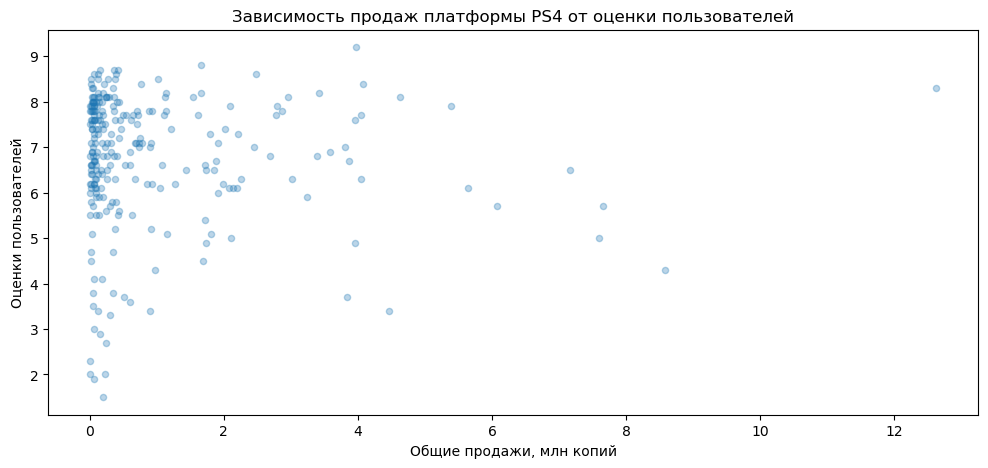

In [39]:
#Построим диаграмму рассеивания со срезом по платформе PS4 и оценке пользователей без заглушек:
(
    filter_data_platforms
    .query('user_score>=0 and platform=="PS4"')
    .plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3, figsize=(12,5)) 
)
plt.xlabel('Общие продажи, млн копий')
plt.ylabel('Оценки пользователей')
plt.title('Зависимость продаж платформы PS4 от оценки пользователей')
plt.show()

Здесь корреляция значительно слабее, чем на прошлом графике. Посчитаем коэффициент корреляции:

In [40]:
(
    filter_data_platforms.query('user_score>=0 and platform=="PS4"')['total_sales']
    .corr(filter_data_platforms.query('user_score>=0 and platform=="PS4"')['user_score'])
)

-0.031957110204556424

Корреляция отрицательная, но близка к 0 - это говорит, что существует даже отрицательная зависимость продаж игр от оценки пользоватлей, но она ничтожна. Можно сказать, что зависимости практически нет.

#### Зависимость продаж от оценок критиков и пользователей платформы PS3:

**Проверим зависимость продаж этой платформы от оценки критиков.**

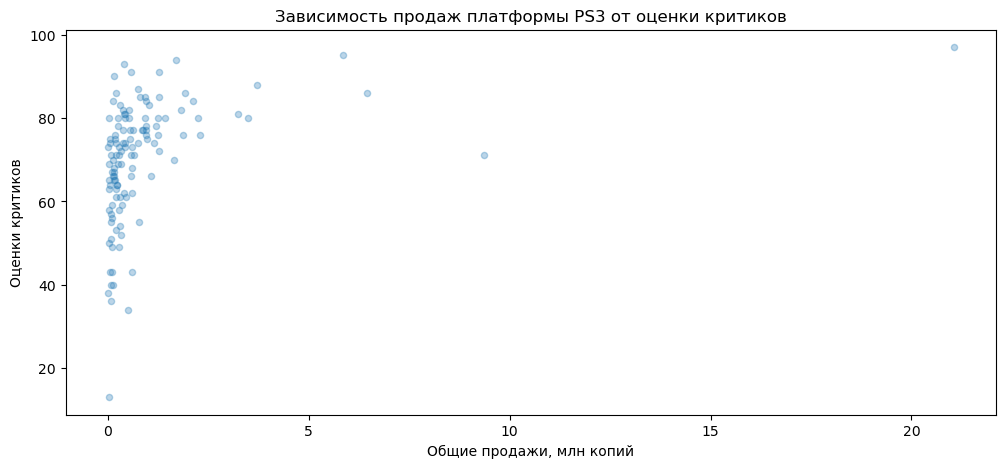

In [41]:
#Построим диаграмму рассеивания со срезом по платформе PS3 и оценке критиков без заглушек:
(
    filter_data_platforms
    .query('critic_score>=0 and platform=="PS3"')
    .plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3, figsize=(12,5)) 
)
plt.xlabel('Общие продажи, млн копий')
plt.ylabel('Оценки критиков')
plt.title('Зависимость продаж платформы PS3 от оценки критиков')
plt.show()

In [42]:
#посчитаем коээффициент корреляции
(
    filter_data_platforms.query('critic_score>=0 and platform=="PS3"')['total_sales']
    .corr(filter_data_platforms.query('critic_score>=0 and platform=="PS3"')['critic_score'])
)

0.3342853393371919

Зависимоть продаж платформы PS3 от оценки критиков прямая, но совсем не значительная. 

**Проверим зависимость продаж от оценки пользователей.**

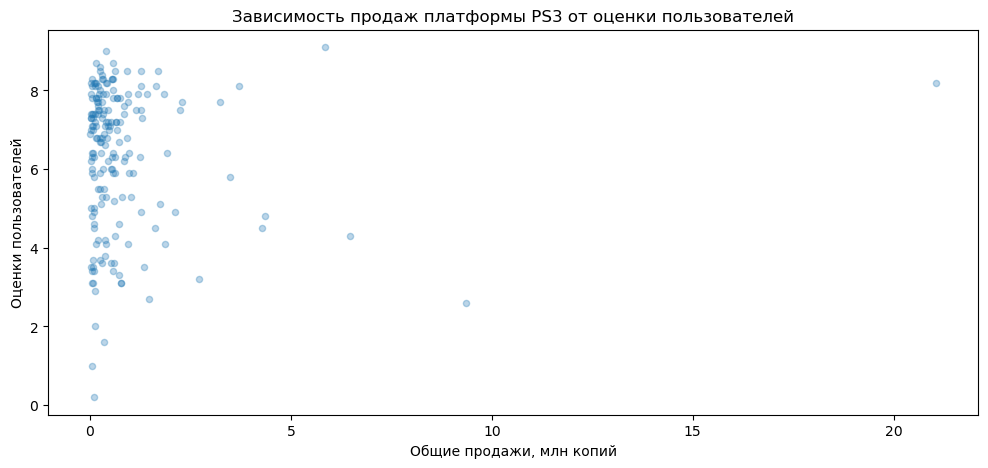

In [43]:
#Построим диаграмму рассеивания со срезом по платформе PS3 и оценке пользователей без заглушек:
(
    filter_data_platforms
    .query('user_score>=0 and platform=="PS3"')
    .plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3, figsize=(12,5)) 
)
plt.xlabel('Общие продажи, млн копий')
plt.ylabel('Оценки пользователей')
plt.title('Зависимость продаж платформы PS3 от оценки пользователей')
plt.show()

In [44]:
#посчитаем коээффициент корреляции
(
    filter_data_platforms.query('user_score>=0 and platform=="PS3"')['total_sales']
    .corr(filter_data_platforms.query('user_score>=0 and platform=="PS3"')['user_score'])
)

0.0023944027357566925

Здесь коэффициент корреляции практически равен 0, значит, зависимости продаж PS3 от оценок пользователей нет.

#### Зависимость продаж от оценок критиков и пользователей платформы XOne:

**Проверим зависимость продаж этой платформы от оценки критиков.**

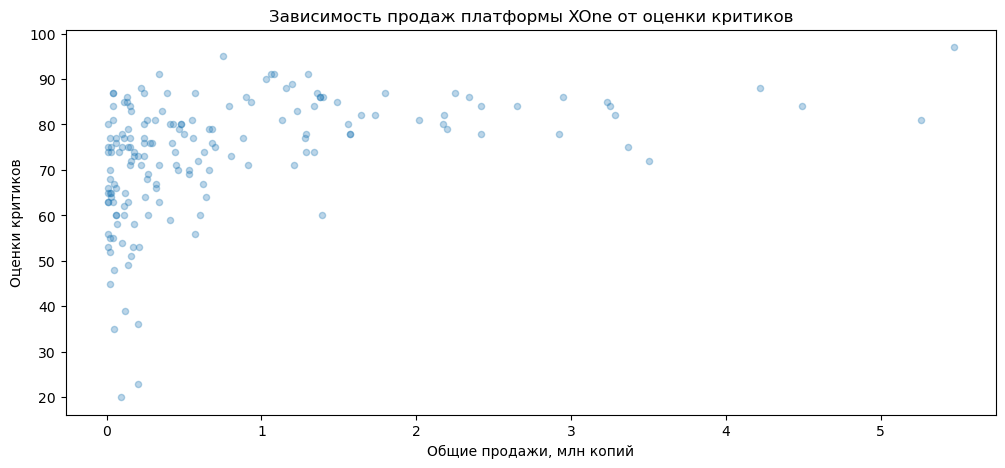

In [45]:
#Построим диаграмму рассеивания со срезом по платформе XOne и оценке критиков без заглушек:
(
    filter_data_platforms
    .query('critic_score>=0 and platform=="XOne"')
    .plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3, figsize=(12,5)) 
)
plt.xlabel('Общие продажи, млн копий')
plt.ylabel('Оценки критиков')
plt.title('Зависимость продаж платформы XOne от оценки критиков')
plt.show()

In [46]:
#посчитаем коээффициент корреляции
(
    filter_data_platforms.query('critic_score>=0 and platform=="XOne"')['total_sales']
    .corr(filter_data_platforms.query('critic_score>=0 and platform=="XOne"')['critic_score'])
)

0.41699832800840175

Наблюдается прямая зависимость продаж XOne от оценки критиков, но не сильная.

**Проверим зависимость продаж от оценки пользователей.**

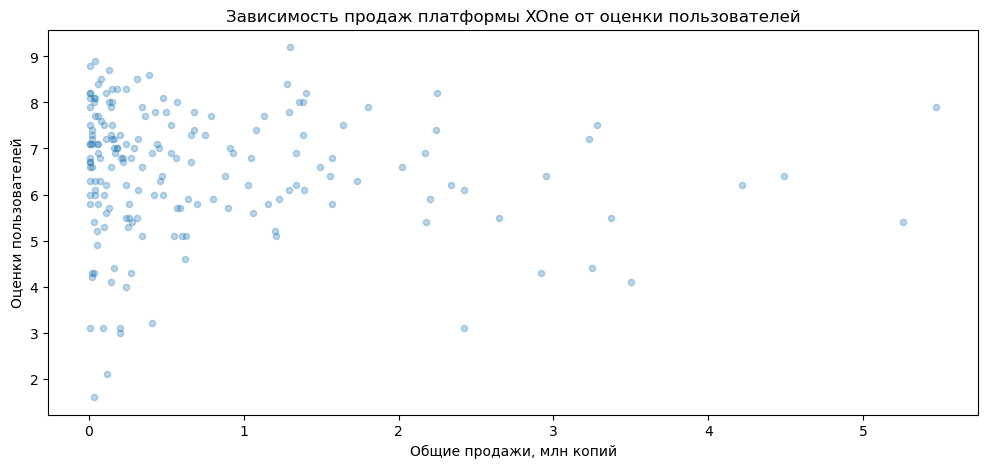

In [47]:
#Построим диаграмму рассеивания со срезом по платформе XOne и оценке пользователей без заглушек:
(
    filter_data_platforms
    .query('user_score>=0 and platform=="XOne"')
    .plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3, figsize=(12,5)) 
)
plt.xlabel('Общие продажи, млн копий')
plt.ylabel('Оценки пользователей')
plt.title('Зависимость продаж платформы XOne от оценки пользователей')
plt.show()

In [48]:
#посчитаем коээффициент корреляции
(
    filter_data_platforms.query('user_score>=0 and platform=="XOne"')['total_sales']
    .corr(filter_data_platforms.query('user_score>=0 and platform=="XOne"')['user_score'])
)

-0.06892505328279412

Коэффициент корреляции почти равен 0. Значит, зависимости продаж XOne от оценки пользователей нет.

#### Зависимость продаж от оценок критиков и пользователей платформы X360:

**Проверим зависимость продаж этой платформы от оценки критиков.**

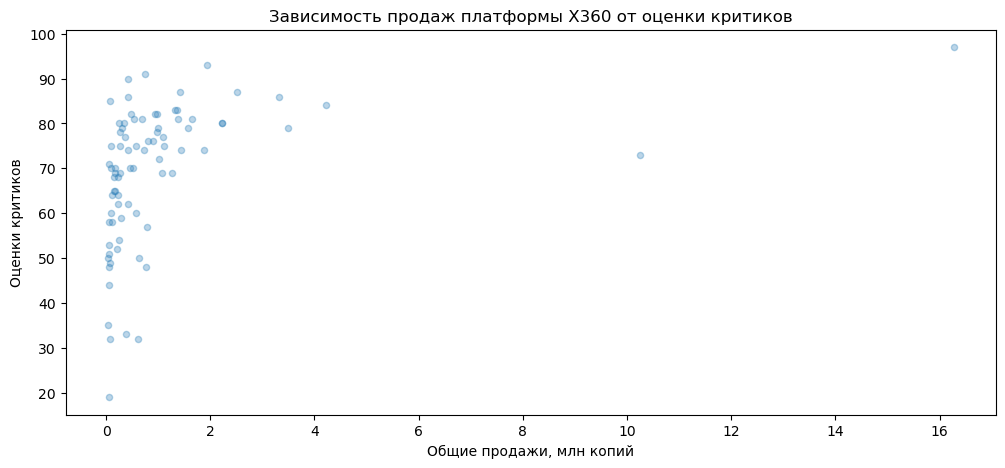

In [49]:
#Построим диаграмму рассеивания со срезом по платформе X360 и оценке критиков без заглушек:
(
    filter_data_platforms
    .query('critic_score>=0 and platform=="X360"')
    .plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3, figsize=(12,5)) 
)
plt.xlabel('Общие продажи, млн копий')
plt.ylabel('Оценки критиков')
plt.title('Зависимость продаж платформы X360 от оценки критиков')
plt.show()

In [50]:
#посчитаем коээффициент корреляции
(
    filter_data_platforms.query('critic_score>=0 and platform=="X360"')['total_sales']
    .corr(filter_data_platforms.query('critic_score>=0 and platform=="X360"')['critic_score'])
)

0.3503445460228664

Наблюдается прямая зависимость продаж XOne от оценки критиков, но не сильная.

**Проверим зависимость продаж от оценки пользователей.**

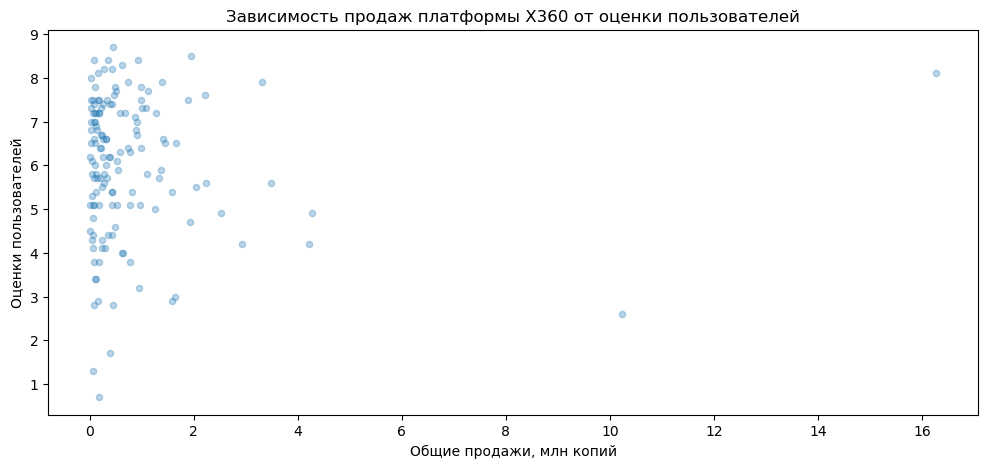

In [51]:
#Построим диаграмму рассеивания со срезом по платформе X360 и оценке пользователей без заглушек:
(
    filter_data_platforms
    .query('user_score>=0 and platform=="X360"')
    .plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3, figsize=(12,5)) 
)
plt.xlabel('Общие продажи, млн копий')
plt.ylabel('Оценки пользователей')
plt.title('Зависимость продаж платформы X360 от оценки пользователей')
plt.show()

In [52]:
#посчитаем коээффициент корреляции
(
    filter_data_platforms.query('user_score>=0 and platform=="X360"')['total_sales']
    .corr(filter_data_platforms.query('user_score>=0 and platform=="X360"')['user_score'])
)

-0.011742185147181342

Коэффициент корреляции почти равен 0. Значит, зависимости продаж X360 от оценки пользователей нет.

#### Зависимость продаж от оценок критиков и пользователей платформы 3DS:

**Проверим зависимость продаж этой платформы от оценки критиков.**

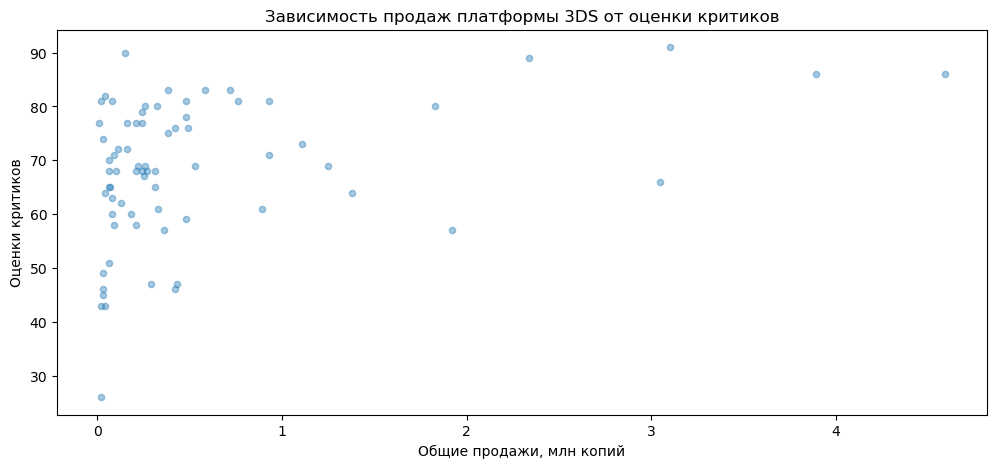

In [53]:
#Построим диаграмму рассеивания со срезом по платформе 3DS и оценке критиков без заглушек:
(
    filter_data_platforms
    .query('critic_score>=0 and platform=="3DS"')
    .plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.4, figsize=(12,5)) 
)
plt.xlabel('Общие продажи, млн копий')
plt.ylabel('Оценки критиков')
plt.title('Зависимость продаж платформы 3DS от оценки критиков')
plt.show()

In [54]:
#посчитаем коээффициент корреляции
(
    filter_data_platforms.query('critic_score>=0 and platform=="3DS"')['total_sales']
    .corr(filter_data_platforms.query('critic_score>=0 and platform=="3DS"')['critic_score'])
)

0.35705661422881035

Наблюдается прямая зависимость продаж XOne от оценки критиков, но не сильная.

**Проверим зависимость продаж от оценки пользователей.**

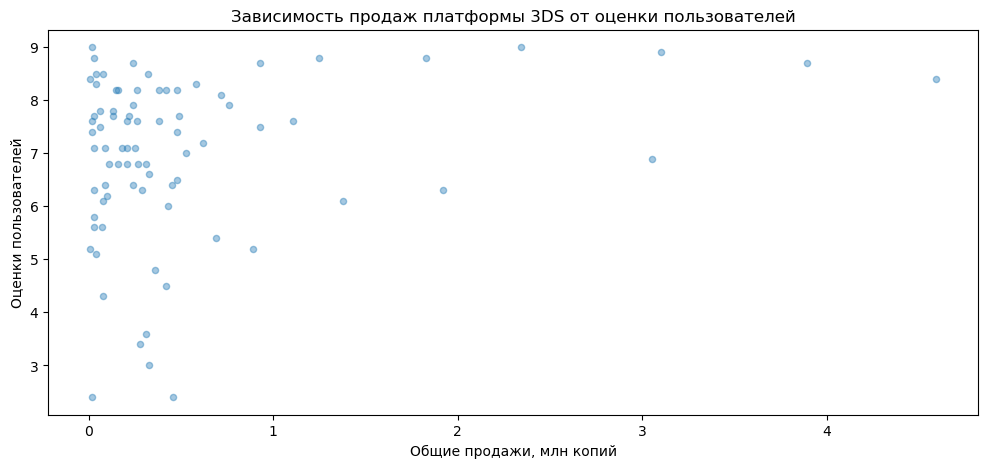

In [55]:
#Построим диаграмму рассеивания со срезом по платформе X360 и оценке пользователей без заглушек:
(
    filter_data_platforms
    .query('user_score>=0 and platform=="3DS"')
    .plot(x='total_sales', y='user_score', kind='scatter', alpha=0.4, figsize=(12,5)) 
)
plt.xlabel('Общие продажи, млн копий')
plt.ylabel('Оценки пользователей')
plt.title('Зависимость продаж платформы 3DS от оценки пользователей')
plt.show()

In [56]:
#посчитаем коээффициент корреляции
(
    filter_data_platforms.query('user_score>=0 and platform=="3DS"')['total_sales']
    .corr(filter_data_platforms.query('user_score>=0 and platform=="3DS"')['user_score'])
)

0.24150411773563016

Наблюдается очень слабая прямая зависимость продаж платформы 3DS от оценок пользователей. Это единственная платформа, где эта зависимость есть.

Итак, по шагу 3.6 "Зависимость продаж топ-платформ от оценок пользователей и критиков" можно сделать общий вывод:

* Продажи топ-платформ имеют прямую зависимость от оценок критиков, но слабую (коэффициент корреляции составляет примерно 0.3-0.4 по всем платформам)
* Продажи топ-платформ не имеют зависимости от оценок пользователей. Единственная платформа, к которой наблюдается прямая, но очень слабая зависимость (коэффициент корреляции 0.24), это 3DS.

### Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Создадим сводную таблицу с группировкой по жанрам и подсчетом общих продаж по этим жанрам и построим соответствующий график распределения, отсортируя жанры в порядке убывания продаж:

In [57]:
filter_data_platforms.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,285.96
Shooter,216.22
Sports,142.48
Role-Playing,127.83
Misc,43.57
Racing,31.46
Fighting,27.91
Platform,22.88
Adventure,18.59


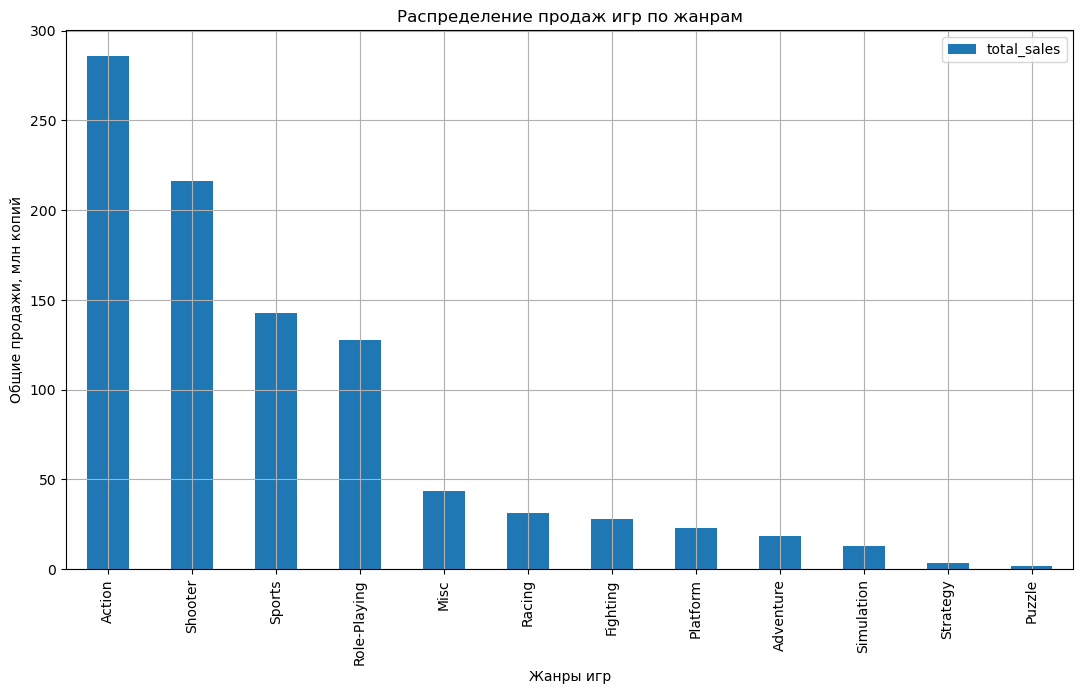

In [58]:
(
    filter_data_platforms
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar', figsize=(13,7), grid=True)
)
plt.xlabel('Жанры игр')
plt.ylabel('Общие продажи, млн копий')
plt.title('Распределение продаж игр по жанрам')
plt.show()

In [59]:
print('Продажи жанра Action больше продаж жанра Puzzle в', round(285.96/1.79,1), 'раз')

Продажи жанра Action больше продаж жанра Puzzle в 159.8 раз


Первое место по продажам занимает жанр Action - игр с этим жанром продано почти 286 млн копий. Далее можно выделить еще тройку самых прибыльных жанров: Shooter (216.22 млн копий), Sports (142.48 млн копий) и Role-Playing	(127.83 млн копий). У следующих жанров продажи резко ниже. Последнее место по продажам занимает жанр Puzzle - 1.79 млн копий, что в 160 раз меньше продаж жанра Action. Так что жанры с высокими и низкими продажами очень выделяются и разнятся между собой.

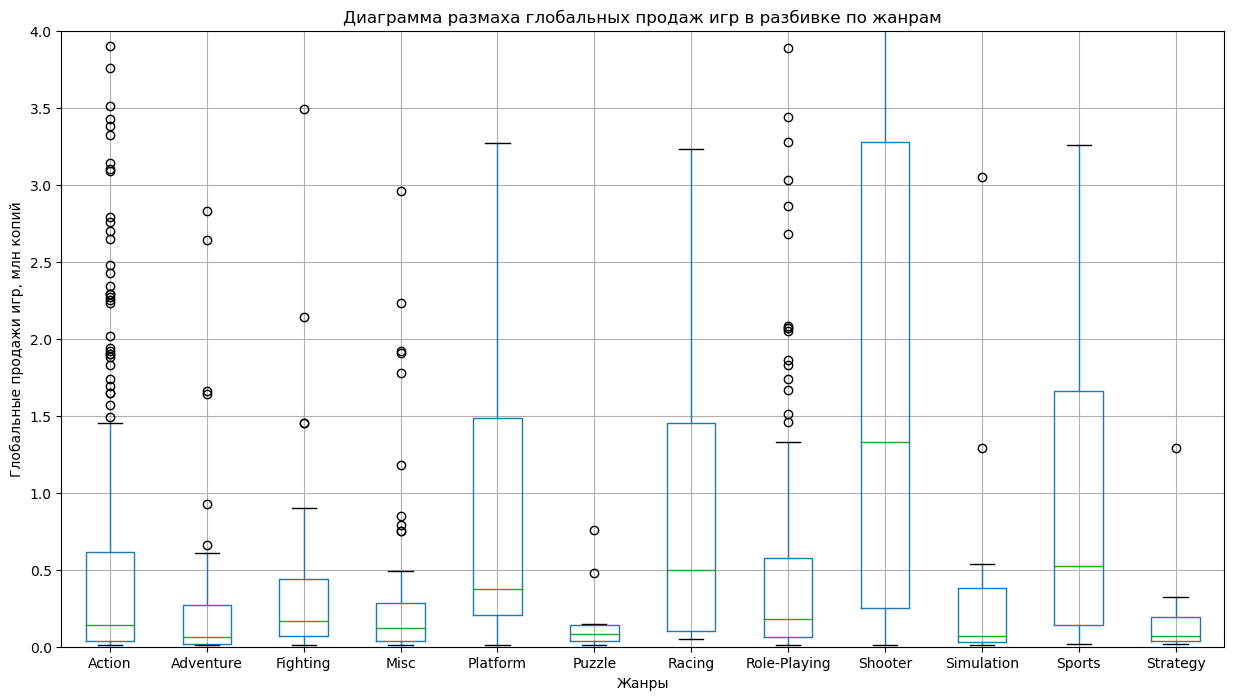

In [60]:
(
    filter_data_platforms
    .pivot_table(index='name', columns='genre', values='total_sales', aggfunc='sum')
    .boxplot(figsize=(15,8))
)
plt.ylim(0, 4)
plt.xlabel('Жанры')
plt.ylabel('Глобальные продажи игр, млн копий')
plt.title('Диаграмма размаха глобальных продаж игр в разбивке по жанрам')
plt.show()

Видя картину продаж отдельных игр по жанрам, можно сделать дополнительные выводы:

* У жанра Shooter самые большие медианные продажи и продажи, входящие в 75% проданных игр
* Далее по этим же показателям можно отметить жанры: Sports, Racing, Platform
* Жанр Action имеет такое большое количество общих продаж за счет только некоторых игр, которые на диаграмме являются выбросами, т.е. доходы по этому жанру будут достаточно нестабильными по сравнению с вышеуказанными жанрами.
* Что касается жанров с невысокими показателями общих продаж (например, Adventure, Puzzle, Simulation, Stategy) - на диаграмме размаха мы видим, что они достаточно стабильны в продажах от игры к игре (выбросов единицы), но не приносят большого общего дохода.

**Итак, в ходе выполнения шага 3 Исследовательский анализ данных было исследованы следующие вопросы:**
* Сколько игр выпускалось в разные годы
* Как менялись продажи по платформам
* Определен актуальный период для дальнейшего анализа данных
* Какие платформы лидируют по продажам, растут или падают
* Построен график «ящик с усами» по глобальным продажам игр в разбивке по платформам
* Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
* Общее распределение игр по жанрам.

## Портрет пользователя каждого региона

Составим портрет пользователя каждого региона.
Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишем различия в долях продаж.
* Самые популярные жанры (топ-5). Поясним разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для выполнения шага 4 будем пользоваться отфильтрованной таблице с актуальным периодом:

In [61]:
filter_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,unknown,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


### Самые популярные платформы (топ-5). Опишем различия в долях продаж.

#### Топ-5 платформ в регионе NA (Америке):

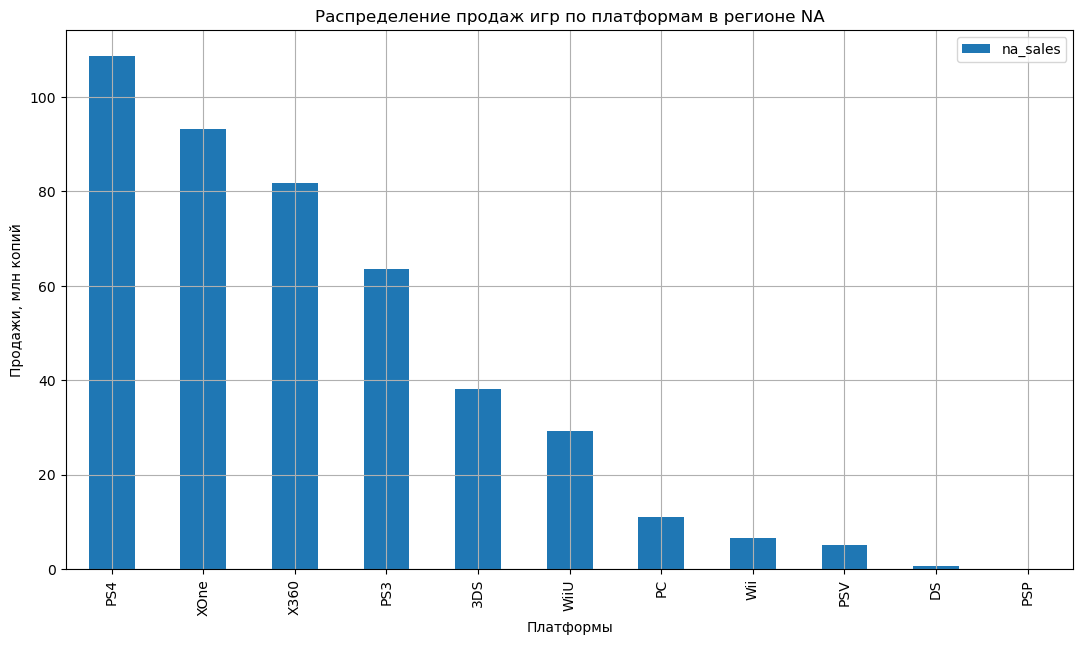

In [62]:
#создаем сводную таблицу с группировкой по платформам с суммой продаж в регионе NA
#сортируем по убыванию продаж
#строим график с распределением продаж этих платформ
(
    filter_data
    .pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .plot(kind='bar', figsize=(13,7), grid=True)
)
plt.xlabel('Платформы')
plt.ylabel('Продажи, млн копий')
plt.title('Распределение продаж игр по платформам в регионе NA')
plt.show()

Посчитаем доли продаж всех 5 топ-платформ

In [63]:
#сначала сохраним сводную таблицу с группировкой по платформам и их продажами
na_pivot = (
    filter_data.
    pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .reset_index()
)

In [64]:
#создаем функцию для группировки по 5 топ-платформам и остальным платформам, объединенным в группу others
def platform(row):
    try:
        if row['platform']=='PS4':
            return 'PS4'
        elif row['platform']=='XOne':
            return 'XOne'
        elif row['platform']=='X360':
            return 'X360'
        elif row['platform']=='PS3':
            return 'PS3'
        elif row['platform']=='3DS':
            return '3DS'
        else:
            return 'others'
    except:
        return 'no_platform'
na_pivot['platform'] = na_pivot.apply(platform, axis=1)

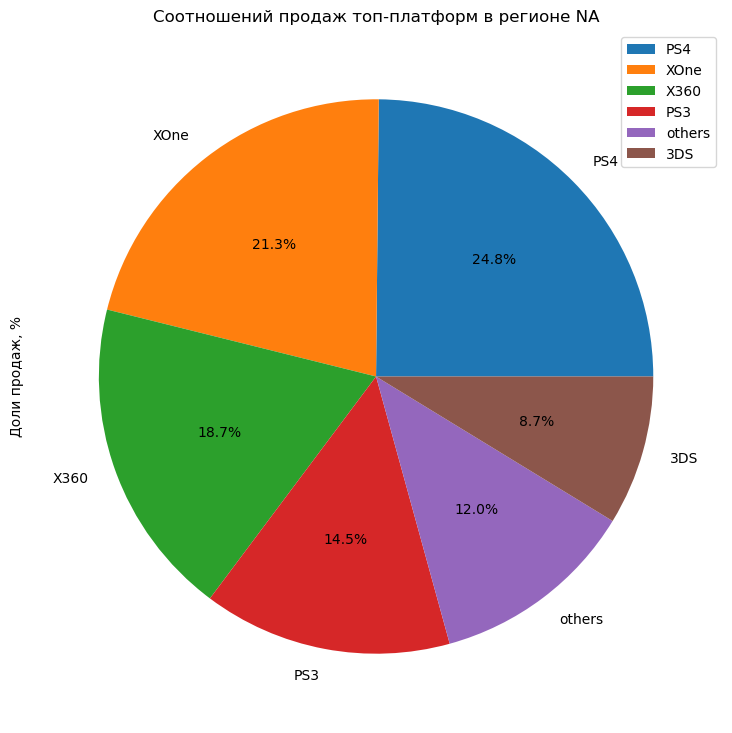

In [65]:
#создаем круговую диарграмму с наглядным распределением платформ по долям
(
    na_pivot
    .pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .plot(y='na_sales', kind='pie', autopct='%1.1f%%', figsize=(9,9))
)
plt.ylabel('Доли продаж, %')
plt.title('Соотношений продаж топ-платформ в регионе NA')

plt.show()

Итак, топ5-платформ в регионе NA и их доли продаж определены:
* PS4 - 24,8%
* XOne - 21,3%
* X360 - 18,7%
* PS3 - 14,5%
* 3DS - 8,7%
* другие платформы - 12%.

Также можно отметить, что в топ-5 платформ в регионе NA входят те же платформы, что и в топ-5 платформ по миру, определенных в анализе выше в шаге 3.4. 

#### Топ-5 платформ в регионе EU (Европа):

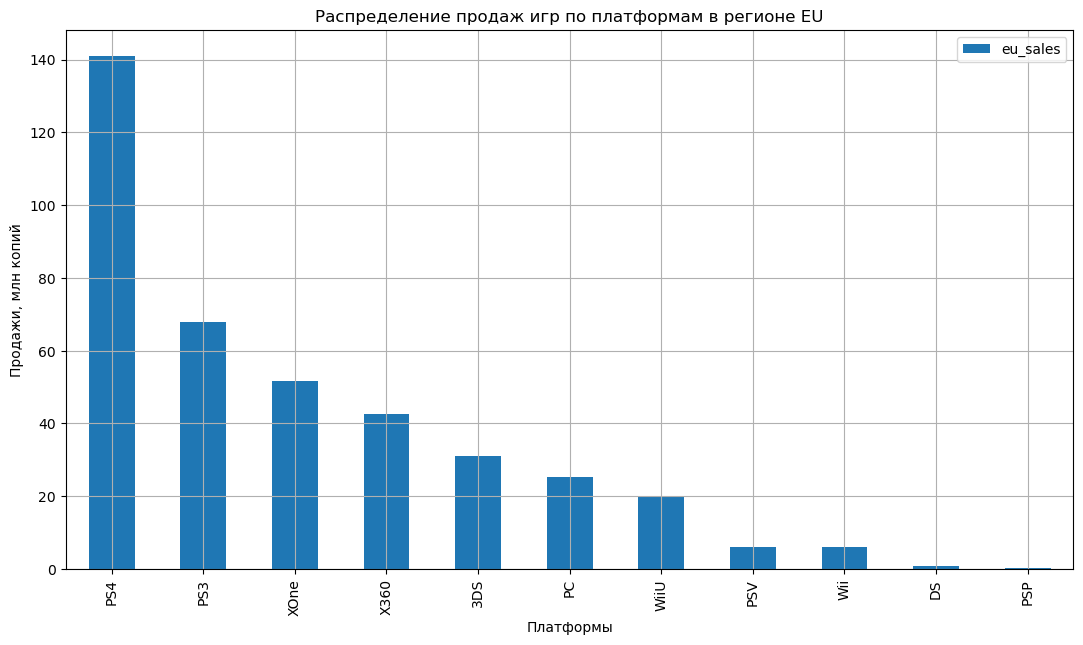

In [66]:
#создаем сводную таблицу с группировкой по платформам с суммой продаж в регионе EU
#сортируем по убыванию продаж
#строим график с распределением продаж этих платформ
(
    filter_data
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .plot(kind='bar', figsize=(13,7), grid=True)
)
plt.xlabel('Платформы')
plt.ylabel('Продажи, млн копий')
plt.title('Распределение продаж игр по платформам в регионе EU')
plt.show()

Ого, PS4 превышает по продажаем следующую платформу PS3 примерно в 2 раза! Очень прибыльная платформа для этого региона. Xone и X360 отстают от компании Sony и находятся на 3 и 4 местах соответственно, далее завершают топ-5 3DS. Посмотрим на соотношение долей продаж по платформам.

In [67]:
#сначала сохраним сводную таблицу с группировкой по платформам и их продажами
eu_pivot = (
    filter_data.
    pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .reset_index()
)

In [68]:
#создаем функцию для группировки по 5 топ-платформам и остальным платформам, объединенным в группу others
def platform_eu(row):
    try:
        if row['platform']=='PS4':
            return 'PS4'
        elif row['platform']=='XOne':
            return 'XOne'
        elif row['platform']=='X360':
            return 'X360'
        elif row['platform']=='PS3':
            return 'PS3'
        elif row['platform']=='3DS':
            return '3DS'
        else:
            return 'others'
    except:
        return 'no_platform'
eu_pivot['platform'] = eu_pivot.apply(platform_eu, axis=1)

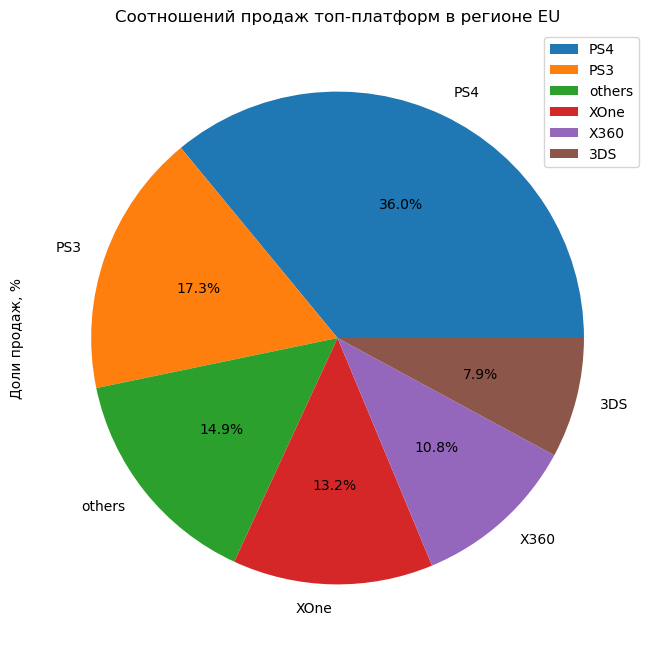

In [69]:
#создаем круговую диарграмму с наглядным распределением платформ по долям
(
    eu_pivot
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .plot(y='eu_sales', kind='pie', autopct='%1.1f%%', figsize=(8,8))
)
plt.ylabel('Доли продаж, %')
plt.title('Соотношений продаж топ-платформ в регионе EU')

plt.show()

Итак, топ5-платформ в регионе EU и их доли продаж определены:
* PS4 - 36 %
* PS3 - 17,3 %
* Xone - 13,2 %
* X360 - 10,8 %
* 3DS - 7,9 %
* другие платформы - 13,2 %.

Топ-5 платформ в Европе те же, что топ-5 платформ по миру и в регионе Америки, но порядок их расположения по продажам существенно отличается от Америки. Платформы от компании Sony, особенно PS4, здесь значительно приоритетнее других.

#### Топ-5 платформ в регионе JP (Япония):

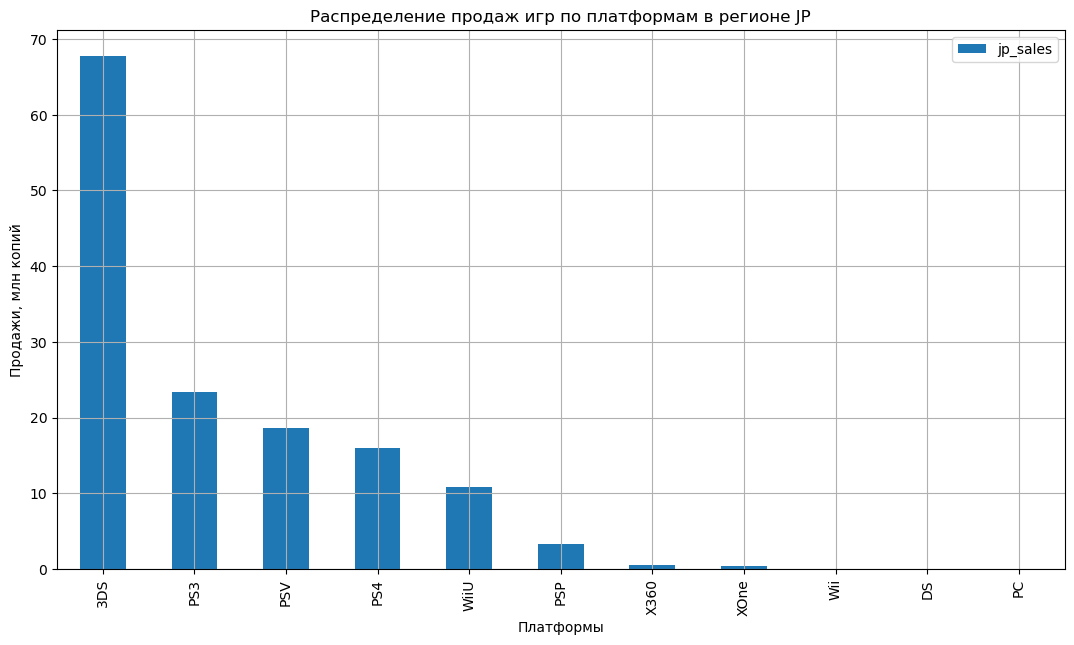

In [70]:
#создаем сводную таблицу с группировкой по платформам с суммой продаж в регионе JP
#сортируем по убыванию продаж
#строим график с распределением продаж этих платформ
(
    filter_data
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .plot(kind='bar', figsize=(13,7), grid=True)
)
plt.xlabel('Платформы')
plt.ylabel('Продажи, млн копий')
plt.title('Распределение продаж игр по платформам в регионе JP')
plt.show()

Ого, кардинально другая картина в Японии. Первое место в топ-5 платформ, это 3DS ручная консоль от Nintendo. Логично предположить первенство портативной консоли (по графику видим, что она превышает следующую за ней по продажам платформу PS3 более, чем в 2,5 раза!), потому что ритм жизни японцев, вероятно, не оставляет им времени для игр за стационарными платформами. 

In [71]:
#сначала сохраним сводную таблицу с группировкой по платформам и их продажами
jp_pivot = (
    filter_data.
    pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .reset_index()
)

In [72]:
#создаем функцию для группировки по 5 топ-платформам и остальным платформам, объединенным в группу others
def platform_jp(row):
    try:
        if row['platform']=='PS4':
            return 'PS4'
        elif row['platform']=='PSV':
            return 'PSV'
        elif row['platform']=='WiiU':
            return 'WiiU'
        elif row['platform']=='PS3':
            return 'PS3'
        elif row['platform']=='3DS':
            return '3DS'
        else:
            return 'others'
    except:
        return 'no_platform'
jp_pivot['platform'] = jp_pivot.apply(platform_jp, axis=1)

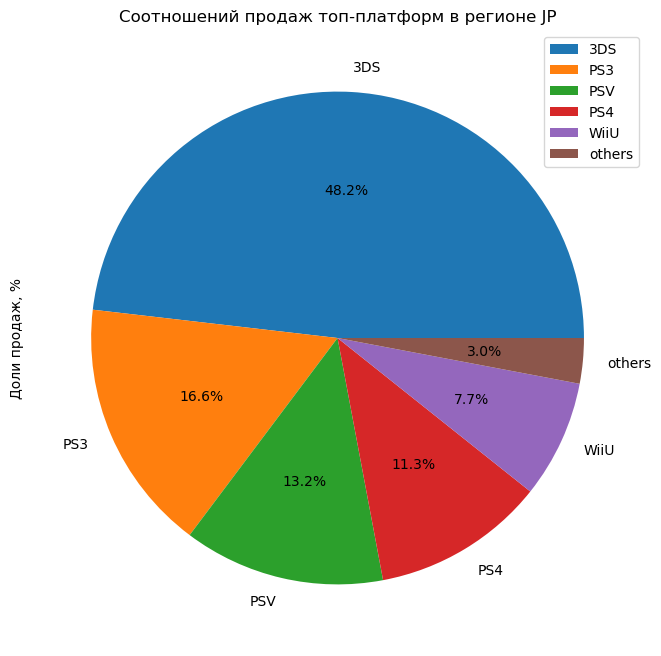

In [73]:
#создаем круговую диарграмму с наглядным распределением платформ по долям
(
    jp_pivot
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .plot(y='jp_sales', kind='pie', autopct='%1.1f%%', figsize=(8,8))
)
plt.ylabel('Доли продаж, %')
plt.title('Соотношений продаж топ-платформ в регионе JP')

plt.show()

Итак, топ5-платформ в регионе JP и их доли продаж определены:
* 3DS - 48,2 %
* PS3 - 16,6 %
* PSV - 13,2 %
* PS4 - 11,3 %
* WiiU - 7,7 %
* другие платформы - всего 3 %.

Подведем итог по шагу 4.1. В Америке и Европе мы видим всего по 1 портативной консоле в топ-5 платформах, это 3DS и она занимает пятое место в этих регионах по продажам игр. В Японии кардинально другая картина: 2 портативных консоли (3DS и PSV) входят в топ-5 и занимают 1 и 3 места соответственно, портативная консоль 3DS занимает почти половину от общих продаж в Японии! В Америке у топ-5 платформ наблюдается более плавное отставание по продажам друг от друга, а вот в Европе существенно выигрывает PS4. Для прогноза на следующий год стоит учитывать полученные данные по регионам обязательно, т.к. они существенно отличаются.

### Самые популярные жанры (топ-5). Поясним разницу.

In [74]:
filter_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,unknown,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


#### Топ-5 жанров в регионе NA

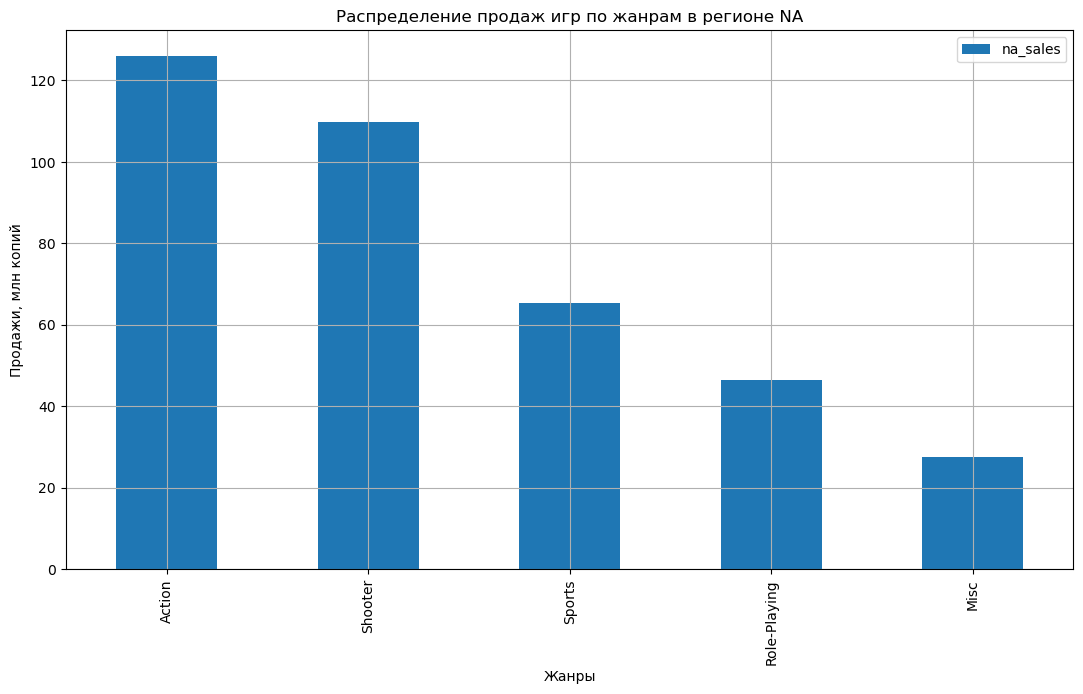

In [75]:
#создаем сводную таблицу с группировкой по жанрам с суммой продаж в регионе NA
#сортируем по убыванию продаж
#строим график с распределением продаж по жанрам
(
    filter_data
    .pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .head()
    .plot(kind='bar', figsize=(13,7), grid=True)
)
plt.xlabel('Жанры')
plt.ylabel('Продажи, млн копий')
plt.title('Распределение продаж игр по жанрам в регионе NA')
plt.show()

In [76]:
#и выведем на экран сводную таблицу с группировкой по жанрам и их продажам в регионе NA
(
    filter_data
    .pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .head()
)

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


Итак, мы получили топ-5 жанров игр в Америке и сумму их продаж в млн копий (см.табл.выше)

#### Топ-5 жанров в регионе EU

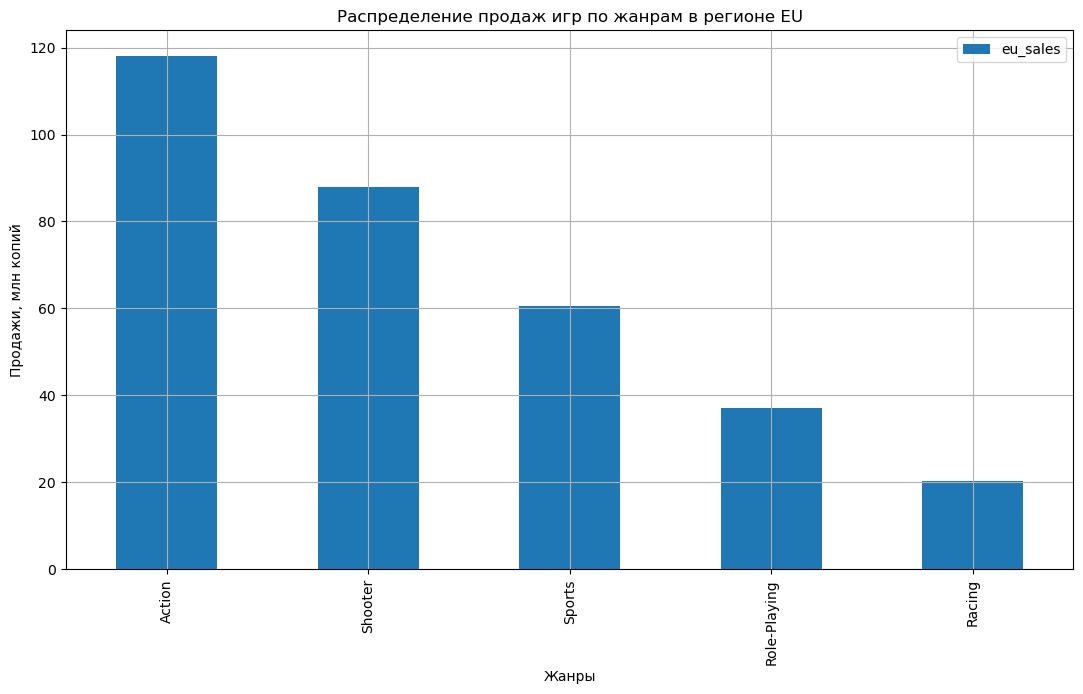

In [77]:
#создаем сводную таблицу с группировкой по жанрам с суммой продаж в регионе EU
#сортируем по убыванию продаж
#строим график с распределением продаж по жанрам
(
    filter_data
    .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .head()
    .plot(kind='bar', figsize=(13,7), grid=True)
)
plt.xlabel('Жанры')
plt.ylabel('Продажи, млн копий')
plt.title('Распределение продаж игр по жанрам в регионе EU')
plt.show()

In [78]:
#и выведем на экран сводную таблицу с группировкой по жанрам и их продажам в регионе EU
(
    filter_data
    .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .head()
)

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


Итак, мы получили топ-5 жанров игр в Европе и сумму их продаж в млн копий (см.табл.выше)

#### Топ-5 жанров в регионе JP

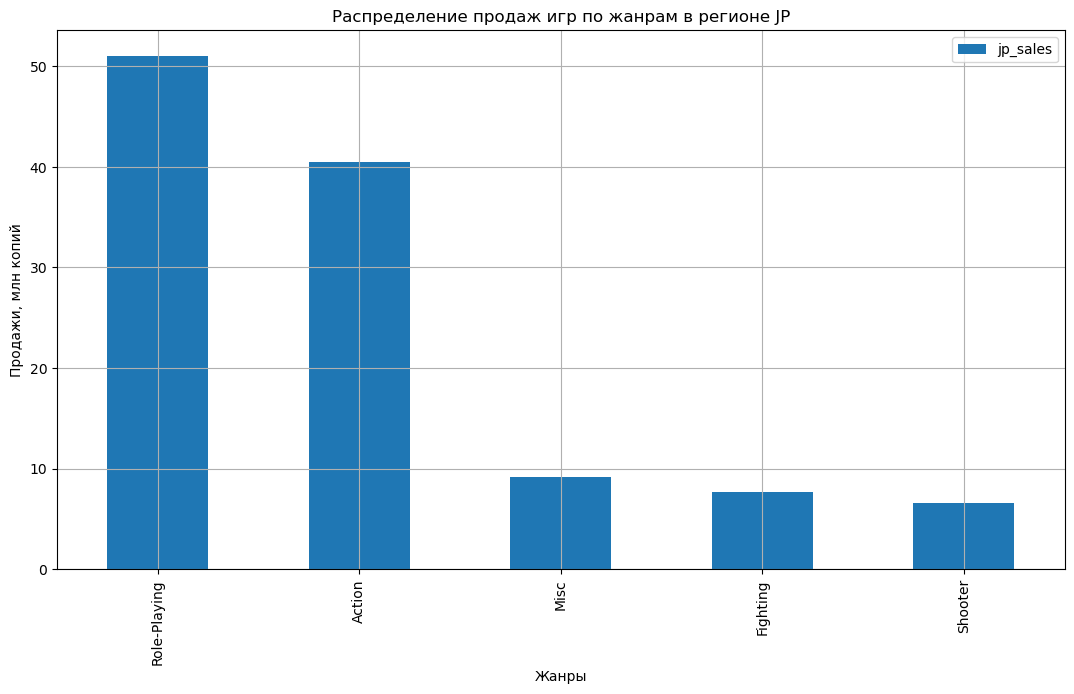

In [79]:
#создаем сводную таблицу с группировкой по жанрам с суммой продаж в регионе EU
#сортируем по убыванию продаж
#строим график с распределением продаж по жанрам
(
    filter_data
    .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .head()
    .plot(kind='bar', figsize=(13,7), grid=True)
)
plt.xlabel('Жанры')
plt.ylabel('Продажи, млн копий')
plt.title('Распределение продаж игр по жанрам в регионе JP')
plt.show()

In [80]:
#и выведем на экран сводную таблицу с группировкой по жанрам и их продажам в регионе JP
(
    filter_data
    .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .head()
)

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


Мы получили топ-5 жанров игр в Японии и сумму их продаж в млн копий (см.табл.выше)

Итак, подведем итог по шагу 4.2. В Америке и Европе картина по топ-5 жанрам похожая, первые 4 места занимают одни и те же жанры с более-менее равномерным отставанием друг от друга, это (в порядке убывания):
* Action
* Shooter
* Sports
* Role-Playing	

В Японии снова картина сильно отличается. Первые два места в топ-5 жанрах в Японии занимают Role-Playing и Action, которые в несколько раз превышают по продажам следующие жанры из топ-5. 

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [81]:
filter_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,unknown,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


#### Влияние рейтинга ESRB на продажи в регионе NA

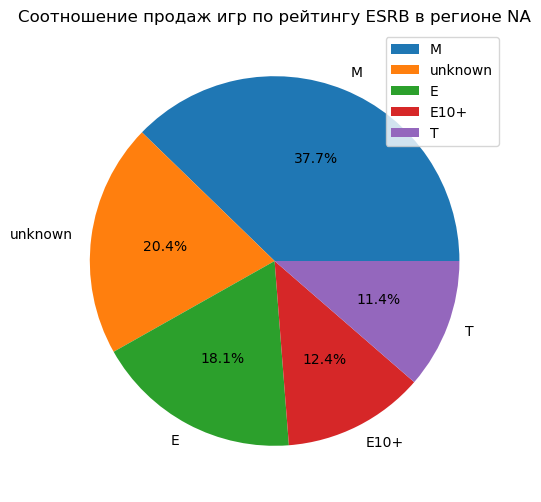

In [82]:
#создаем сводную таблицу с группировкой по рейтингу с суммой продаж в регионе NA
#сортируем по убыванию продаж
#строим круговую диаграмму для наглядности распределения долей продаж по рейтингу
(
    filter_data
    .pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .plot(y='na_sales', kind='pie', autopct='%1.1f%%', figsize=(6,6))
)

plt.ylabel('')
plt.title('Соотношение продаж игр по рейтингу ESRB в регионе NA')
plt.show()

#### Влияние рейтинга ESRB на продажи в регионе EU

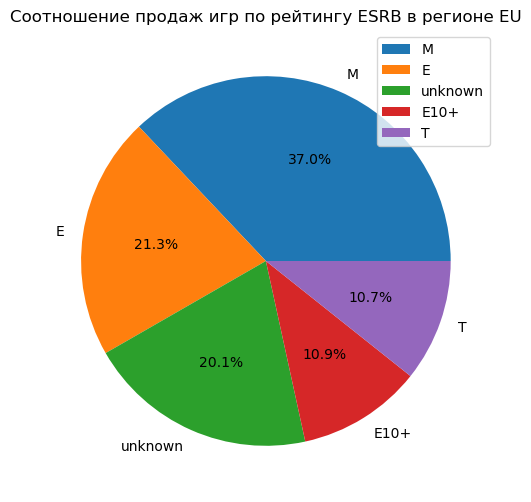

In [83]:
#создаем сводную таблицу с группировкой по рейтингу с суммой продаж в регионе NA
#сортируем по убыванию продаж
#строим круговую диаграмму для наглядности распределения долей продаж по рейтингу
(
    filter_data
    .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .plot(y='eu_sales', kind='pie', autopct='%1.1f%%', figsize=(6,6))
)

plt.ylabel('')
plt.title('Соотношение продаж игр по рейтингу ESRB в регионе EU')
plt.show()

#### Влияние рейтинга ESRB на продажи в регионе JP

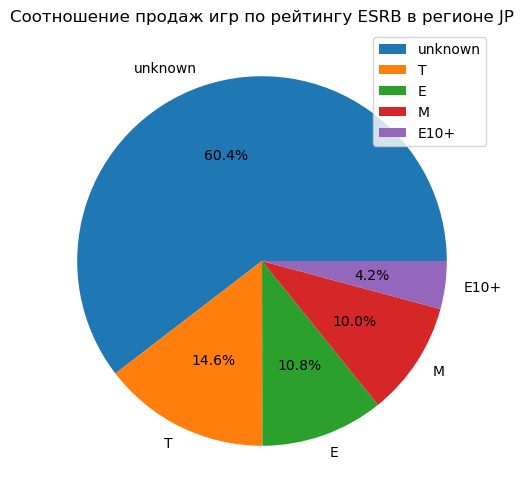

In [84]:
#создаем сводную таблицу с группировкой по рейтингу с суммой продаж в регионе JP
#сортируем по убыванию продаж
#строим круговую диаграмму для наглядности распределения долей продаж по рейтингу
(
    filter_data
    .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .plot(y='jp_sales', kind='pie', autopct='%1.1f%%', figsize=(6,6))
)

plt.ylabel('')
plt.title('Соотношение продаж игр по рейтингу ESRB в регионе JP')
plt.show()

Итак, по шагу 4.3 можно сказать, что портрет пользователя игр в Японии снова существенно отличается от портретов пользователей Америки и Европы (они похожи). В Америке и Европе распределение продаж игр по возрастному рейтингу следующее (в порядке убывания продаж):
* M («Mature») — «Для взрослых»
* E («Everyone») — «Для всех»
* E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше»
* T («Teen») — «Подросткам»

Т.е. премущественно игры покупают взрослые, тогда как категории "дети от 10 лет" и "подростки" имеют примерно одинаковые продажи и находятся на 3 и 4 местах соотвественно. В Японии следующее распределение:
* T («Teen») — «Подросткам»
* E («Everyone») — «Для всех»
* M («Mature») — «Для взрослых»
* E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше»

Т.е. больше всех игр покупают подростковые, игры для взрослой категории на 3ем месте.

Расшифровка рейтингов ESRB взята по ссылке: [Википедия рейтинг ESRB](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board)

**Итак, по шагу 4 составлены портреты пользователей трех регионов по следующим критериям:**
* по самым популярным платформам (топ-5)
* по самым популярным жанрам игр (топ-5)
* по возрастному рейтингу игр ESRB 

## Проверка гипотез

Проверим гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Зададим самостоятельно пороговое значение alpha.
Поясним:
* Как мы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.

### Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [85]:
filter_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,unknown,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


В данном случае мы будем проверять гипотезу о равенстве средних двух генеральных совокупностей t-тестом. Сформулируем нулевую и альтернативную гипотезы:

* Нулевая гипотеза: средние пользовательские рейтинги платформ XOne и PC равны
* Альтернативная гипотеза: средние пользовательские рейтинги платформ XOne и PC не равны

Гипотеза двухсторонняя, т.к. альтернативная звучит "не равны", т.е. мы будем рассматривать обе стороны неравенства.

Создадим 2 отфильтрованные таблицы по интересующим нас платформам XOne и PC:

In [86]:
xone = filter_data.query('platform=="XOne" and user_score>=0').reset_index(drop=True)
xone.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,2014.934066,0.431923,0.238132,0.001593,0.066044,66.648352,6.521429,0.737692
std,0.989472,0.620657,0.377369,0.005679,0.092520,24.990108,1.380941,1.018062
min,2013.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.600000,0.010000
25%,2014.000000,0.040000,0.020000,0.000000,0.010000,63.000000,5.800000,0.082500
50%,2015.000000,0.170000,0.090000,0.000000,0.030000,75.000000,6.800000,0.300000
75%,2016.000000,0.557500,0.275000,0.000000,0.090000,81.750000,7.500000,1.057500
max,2016.000000,3.220000,2.190000,0.040000,0.480000,97.000000,9.200000,5.470000


In [87]:
pc = filter_data.query('platform=="PC" and user_score>=0').reset_index(drop=True)
pc.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,155.000000,155.000000,155.000000,155.0,155.000000,155.000000,155.000000,155.000000
mean,2014.619355,0.065871,0.142968,0.0,0.017355,72.141935,6.269677,0.226194
std,1.118156,0.135803,0.215051,0.0,0.032012,18.985107,1.742381,0.367903
min,2013.000000,0.000000,0.000000,0.0,0.000000,-1.000000,1.400000,0.010000
25%,2014.000000,0.000000,0.030000,0.0,0.000000,69.000000,5.300000,0.030000
50%,2015.000000,0.000000,0.060000,0.0,0.010000,76.000000,6.800000,0.100000
75%,2016.000000,0.085000,0.150000,0.0,0.020000,82.500000,7.600000,0.245000
max,2016.000000,1.000000,1.820000,0.0,0.230000,96.000000,9.300000,3.050000


Итак, выборки получились разного размера (182 и 154 значения).
Если выборки разного размера и/или можно предположить, что дисперсии у генеральных совокупностей разные, нужно указать, что дисперсии у выборок могут отличаться (equal_var=False при вызове метода scipy.stats.ttest_ind()).

In [88]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем нулевую гипотезу

results = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Итак, на уровне значимости 15% мы не можем отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ XOne и PC равны.

Посчитаем средние значения рассматриваемых для гипотезы выборок. Это позволит нам проверить не ошиблись ли мы, если они расходятся с тестом Стьюдента.

In [89]:
xone['user_score'].mean()

6.521428571428572

In [90]:
pc['user_score'].mean()

6.2696774193548395

Средние значения выборок близки.

### Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные

Создадим 2 отфильтрованные таблицы по интересующим нам жанрам Action и Sports:

In [91]:
action = filter_data.query('genre=="Action" and user_score>=0').reset_index(drop=True)
action

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
3,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95.0,9.1,M,5.86
4,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
...,...,...,...,...,...,...,...,...,...,...,...,...
384,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
385,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01
386,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,-1.0,5.1,E10+,0.01
387,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,unknown,0.01


In [92]:
sports = filter_data.query('genre=="Sports" and user_score>=0').reset_index(drop=True)
sports

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
1,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
2,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
3,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
4,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,-1.0,4.5,E,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...
155,MLB 15: The Show,PSV,2015,Sports,0.01,0.00,0.00,0.00,-1.0,8.8,E,0.01
156,Don Bradman Cricket 14,PS3,2014,Sports,0.00,0.01,0.00,0.00,73.0,6.9,E,0.01
157,Turbo: Super Stunt Squad,X360,2013,Sports,0.00,0.01,0.00,0.00,-1.0,4.5,E,0.01
158,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.00,0.00,-1.0,1.4,E,0.01


В данном случае мы будем проверять гипотезу о равенстве средних двух генеральных совокупностей t-тестом. Сформулируем нулевую и альтернативную гипотезы:

* Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны
* Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports не равны

Гипотеза двухсторонняя, т.к. альтернативная звучит "не равны", т.е. мы будем рассматривать обе стороны неравенства.

Выборки получились разного размера (389 и 160 значений). Если выборки разного размера и/или можно предположить, что дисперсии у генеральных совокупностей разные, нужно указать, что дисперсии у выборок могут отличаться (equal_var=False при вызове метода scipy.stats.ttest_ind()).

In [93]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем нулевую гипотезу

results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Итак, на уровне значимости 1.4e-20 (очень очень малое значение, близкое к 0) мы отвергаем нулевую гипотезу в пользу альтернативной, что средние пользовательские рейтинги жанров Action и Sports не равны.

Посчитаем средние значения рассматриваемых для гипотезы выборок. Это позволит нам проверить не ошиблись ли мы, если они расходятся с тестом Стьюдента.

In [94]:
action['user_score'].mean()

6.837532133676092

In [95]:
sports['user_score'].mean()

5.238124999999999

Средние значения выборок не близки, отлично - сравнимо с результатом проверки гипотезы.

## Общие выводы по работе

Итак, в ходе данной работы были проанализированы данные о продажах игр, оценки пользователей и экспертов, жанры и платформы, доступные из открытых источников в целях определения потенциально прибыльного продукта и планирования рекламных компаний на следующий год. Были выполнены следующие действия:
* предобработка данных,
* исследовательский анализ данных,
* описание портрета пользователя для каждого региона,
* проверка гипотез.

### Исследовательский анализ данных

#### Актуальный период для анализа

В начале исследовательского анализа с данными был определен актуальный период, с которым и проводится вся дальнейшая работа над проектом. Это данные за период 2013-2016 года - данных за 4 года будет достаточно для прогноза на следующий год, более ранние данные могут быть устаревшими и непоказательными для бизнеса.

#### Распределение продаж по платформам

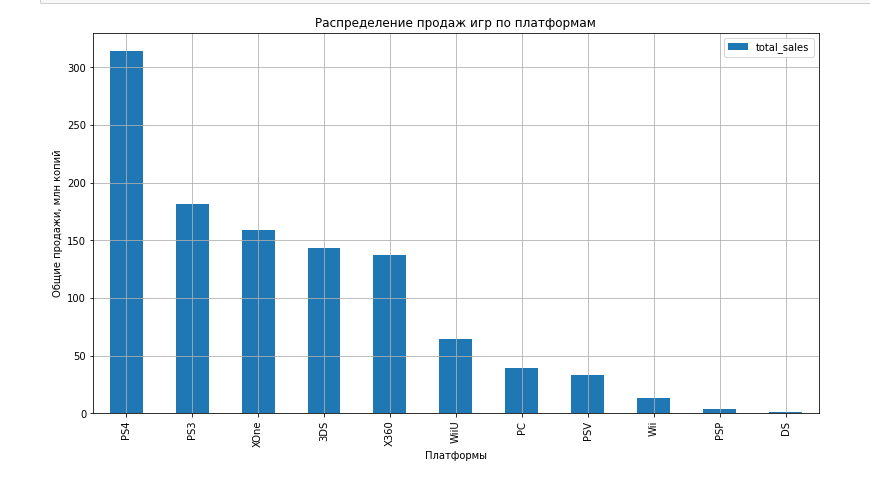

На графике изображено распределение общих продаж игр во всех регионах по платформам в порядке убывания продаж.

Явный лидер по продажам это платформа PS4, далее идет четверка с более плавным оставанием друг от друга: PS3, XOne, 3DS, X360. Ниже распределение продаж этих платформ по годам, посмотрим на развитие продаж этих и других платформ:
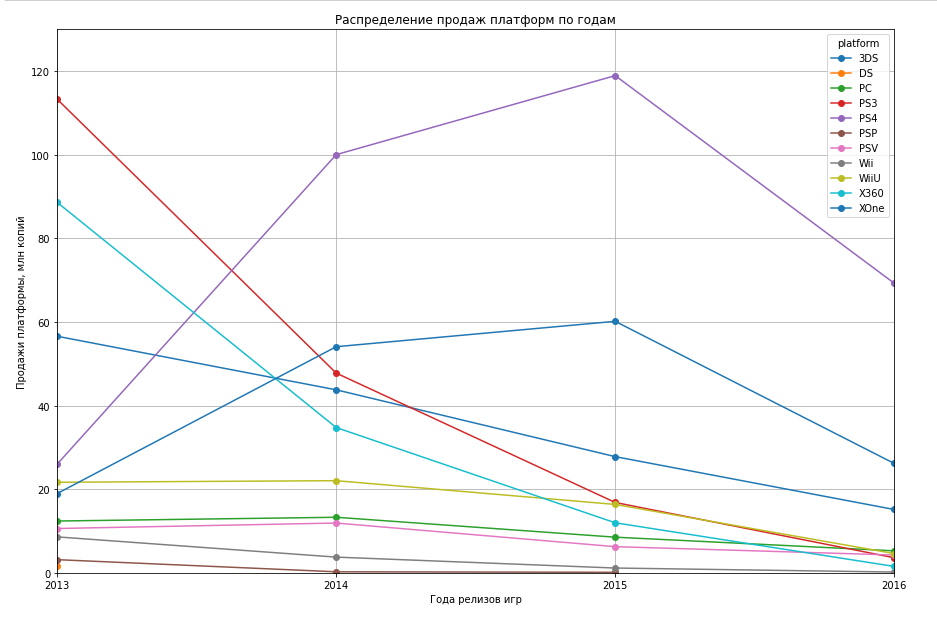

По графику можно точно сказать, что по всем существующим платформам роста продаж нет, начиная с 2015 года. Это логично, т.к. пик продаж (как говорилось ранее) прошел в середине "жизни" платформы или в ее начале, далее будет наблюдаться спад. Также можно отметить, что при появлении новой платформы от одной компании продажи растут, в то время как ее прошлая платформа имеет все меньше продаж, что тоже логично (например, PS4 и PS3, или XOne и X360). Поэтому стоит выбрать потенциально-прибыльные платформы по количеству общих продаж (по первому графику).

Итак, в результате построения графиков можно выделить 5 потенциально-прибыльных платформ:
* PS4
* PS3
* XOne
* 3DS
* X360

#### Глобальные продажи игр в разбивке по топ платформам
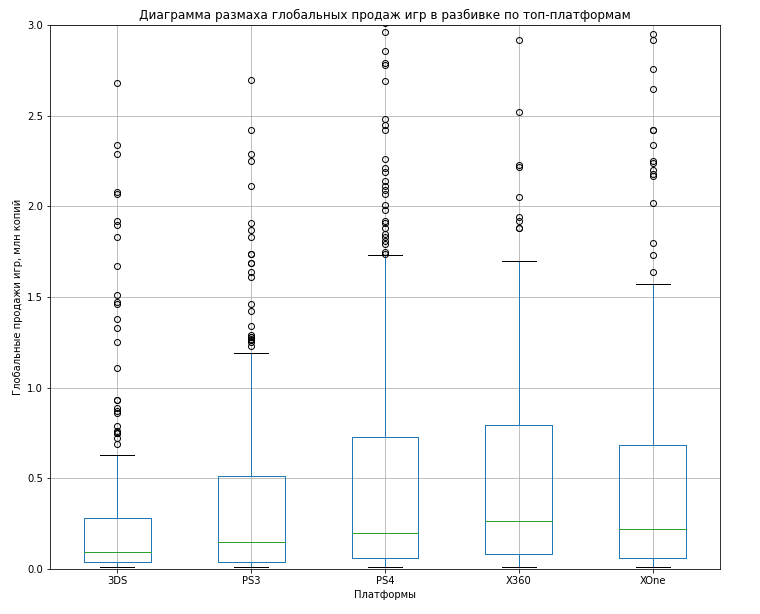

Разница в продажах отличается. У всех платформ имеются очень популярные игры, которые продаются много раз, таковых практически единицы (точки на диаграмме за "усом").
* По PS4 75% всех игр продано в количестве 0.73 млн копий
* По PS3 75% всех игр продано в количестве 0.51 млн копий
* По XOne 75% всех игр продано в количестве 0.68 млн копий
* По X360 75% всех игр продано в количестве 0.79 млн копий
* По 3DS 75% всех игр продано в количестве 0.28 млн копий

Интересно, что платформа X360 выигрывает по продажам, если говорить о медиане продаж (50% игр) и продажах 75% игр. Но на PS4 есть довольно много игр, продающихся очень много раз, которые лежат за пределами "ящика с усами" и поэтому суммарные продажи у этой платформы больше.

#### Зависимость продаж топ-платформ от оценок пользователей и критиков

* Продажи топ-платформ имеют прямую зависимость от оценок критиков, но слабую (коэффициент корреляции составляет примерно 0.3-0.4 по всем платформам)
* Продажи топ-платформ не имеют зависимости от оценок пользователей. Единственная платформа, к которой наблюдается прямая, но очень слабая зависимость (коэффициент корреляции 0.24), это 3DS.

Вывод: не стоит ориентироваться на оценки пользователей и критиков, чтобы оценить продаваемость игры.

#### Распределение игр по жанрам 
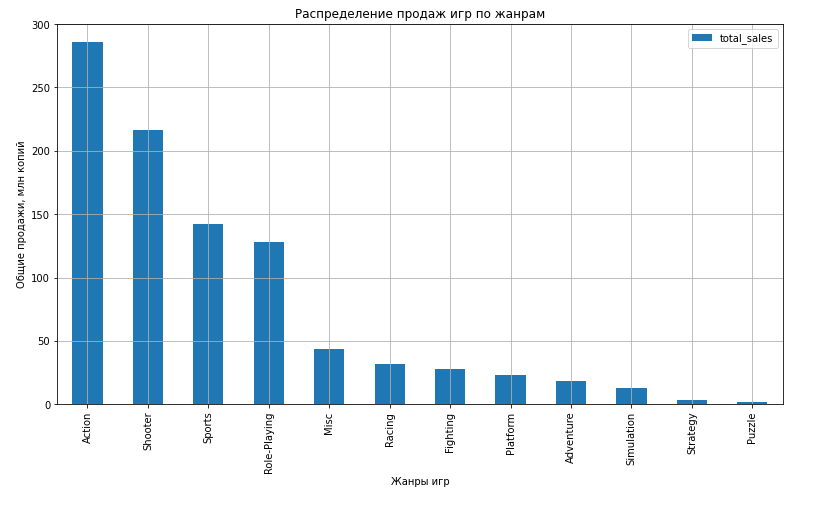

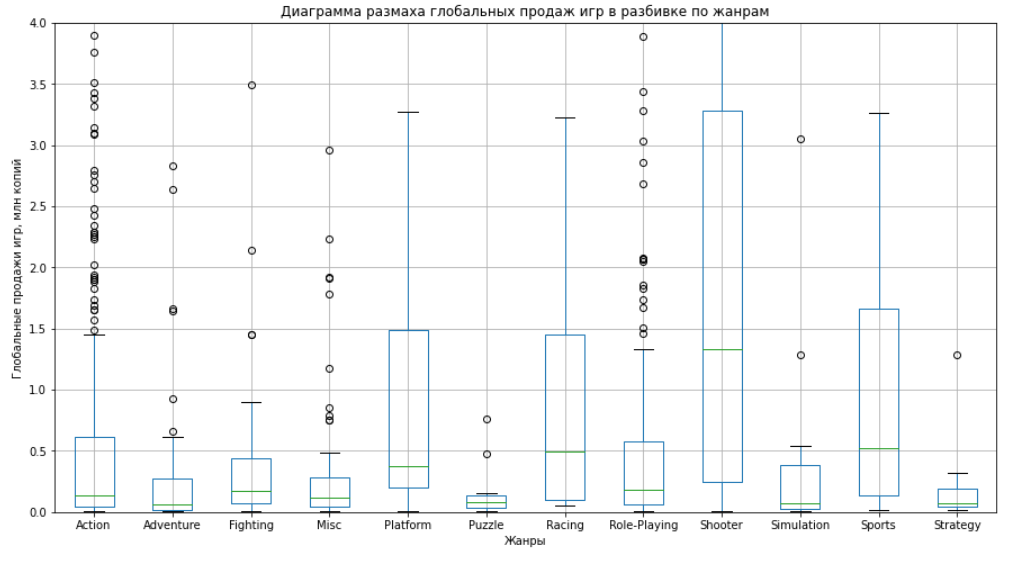

Первое место по продажам занимает жанр Action - игр с этим жанром продано почти 286 млн копий. Далее можно выделить еще тройку самых прибыльных жанров: Shooter (216.22 млн копий), Sports (142.48 млн копий) и Role-Playing (127.83 млн копий). У следующих жанров продажи резко ниже. Последнее место по продажам занимает жанр Puzzle - 1.79 млн копий, что в 160 раз меньше продаж жанра Action. Так что жанры с высокими и низкими продажами очень выделяются и разнятся между собой. Но также можно сделать и другие выводы, исходя из диаграммы размаха:
* У жанра Shooter самые большие медианные продажи и продажи, входящие в 75% проданных игр
* Далее по этим же показателям можно отметить жанры: Sports, Racing, Platform
* Жанр Action имеет такое большое количество общих продаж за счет только некоторых игр, которые на диаграмме являются выбросами, т.е. доходы по этому жанру будут достаточно нестабильными по сравнению с вышеуказанными жанрами.
* Что касается жанров с невысокими показателями общих продаж (например, Adventure, Puzzle, Simulation, Stategy) - на диаграмме размаха мы видим, что они достаточно стабильны в продажах от игры к игре (выбросов единицы), но не приносят большого общего дохода.

### Портрет пользователя каждого региона

#### Самые популярные платформы (топ-5)

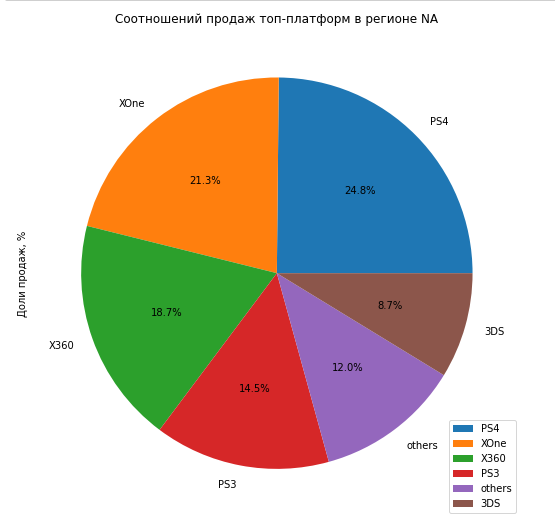

Итак, топ5-платформ в регионе NA (Америка) и их доли продаж определены:
* PS4 - 24,8%
* XOne - 21,3%
* X360 - 18,7%
* PS3 - 14,5%
* 3DS - 8,7%
* другие платформы - 12%.

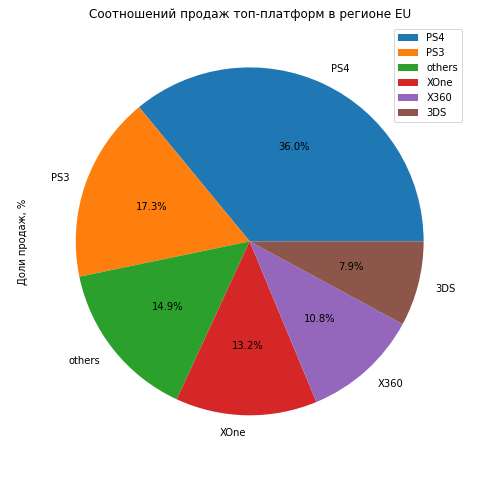

Итак, топ5-платформ в регионе EU (Европа) и их доли продаж определены:
* PS4 - 36 %
* PS3 - 17,3 %
* Xone - 13,2 %
* X360 - 10,8 %
* 3DS - 7,9 %
* другие платформы - 13,2 %.

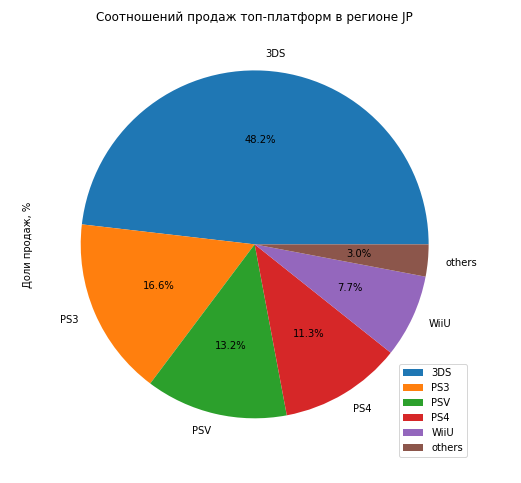

Итак, топ5-платформ в регионе JP (Япония) и их доли продаж определены:
* 3DS - 48,2 %
* PS3 - 16,6 %
* PSV - 13,2 %
* PS4 - 11,3 %
* WiiU - 7,7 %
* другие платформы - всего 3 %.

В Америке и Европе мы видим всего по 1 портативной платформе в топ-5 платформах, это 3DS и она занимает пятое место в этих регионах по продажам игр. В Японии кардинально другая картина: 2 портативных консоли (3DS и PSV) входят в топ-5 и занимают 1 и 3 места соответственно, портативная консоль 3DS занимает почти половину от общих продаж в Японии! В Америке у топ-5 платформ наблюдается более плавное отставание по продажам друг от друга, а вот в Европе существенно выигрывает PS4. Для прогноза продаж на следующий год стоит учитывать полученные данные по регионам обязательно, т.к. они существенно отличаются.

#### Самые популярные жанры (топ-5)

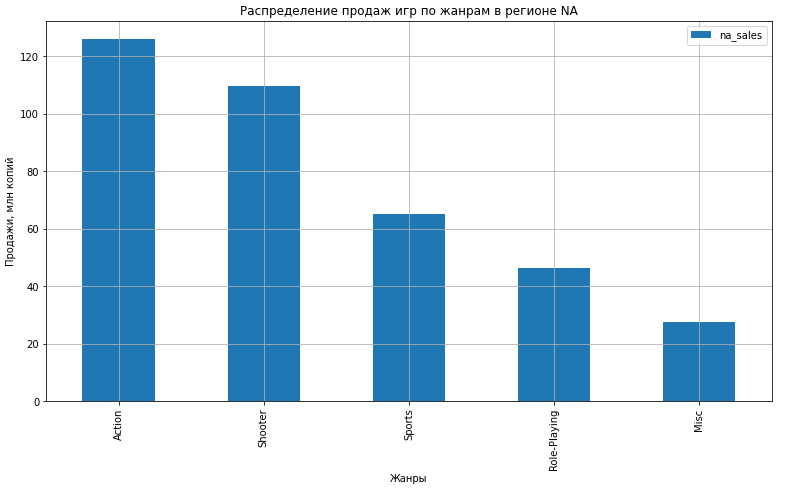

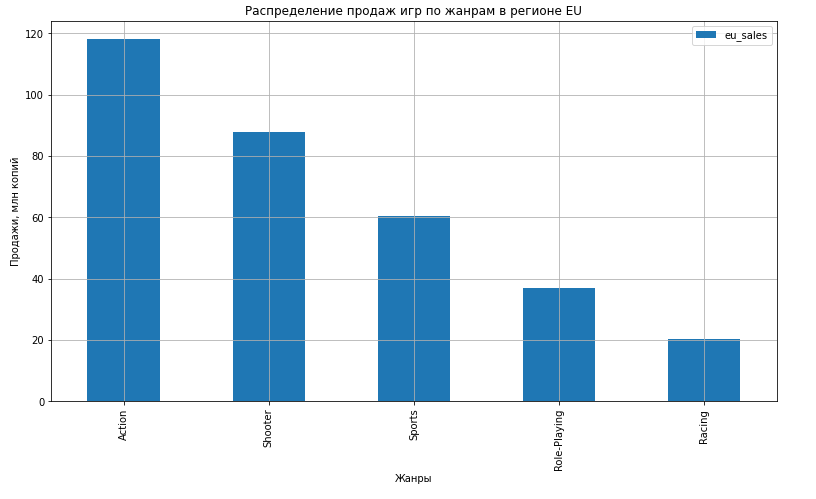

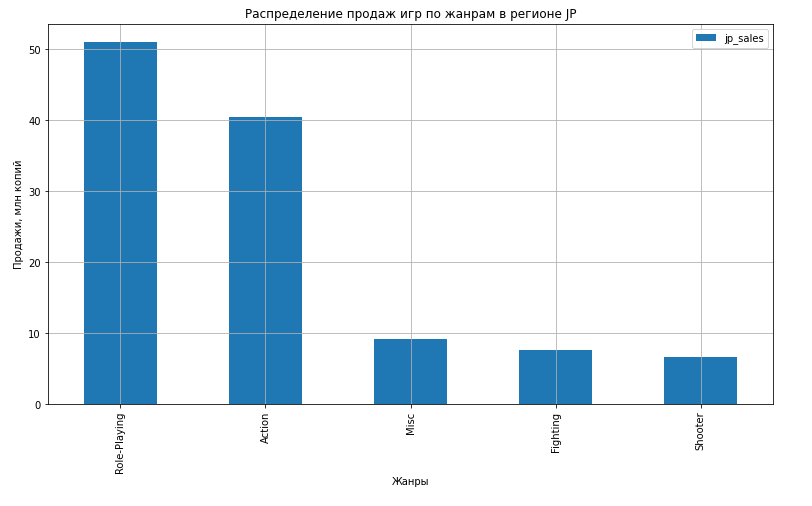

В Америке и Европе картина по топ-5 жанрам похожая, первые 4 места занимают одни и те же жанры с более-менее равномерным отставанием друг от друга, это (в порядке убывания):

* Action
* Shooter
* Sports
* Role-Playing

В Японии снова картина сильно отличается. Первые два места в топ-5 жанрах в Японии занимают Role-Playing и Action, которые в несколько раз превышают по продажам следующие жанры из топ-5.

#### Влияние рейтинга ESRB на продажи в отдельном регионе

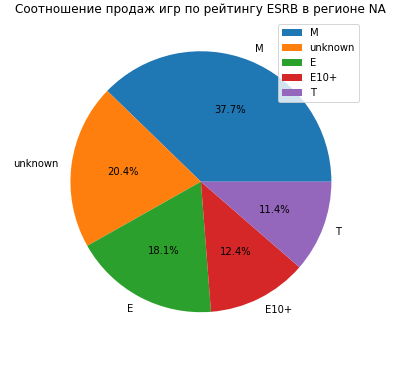

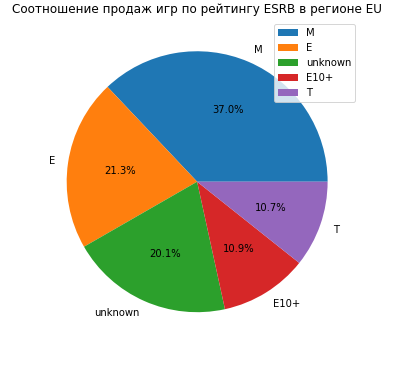

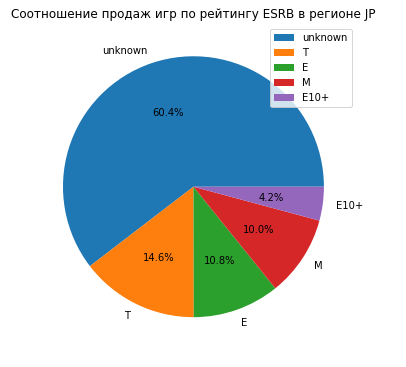

Портрет пользователя игр в Японии по возрастной категории снова существенно отличается от портретов пользователей Америки и Европы (они похожи). В Америке и Европе распределение продаж игр по возрастному рейтингу следующее (в порядке убывания продаж):
* M («Mature») — «Для взрослых»
* E («Everyone») — «Для всех»
* E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше»
* T («Teen») — «Подросткам»

Т.е. премущественно игры покупают взрослые, тогда как категории "дети от 10 лет" и "подростки" имеют примерно одинаковые продажи и находятся на 3 и 4 местах соотвественно. В Японии следующее распределение:
* T («Teen») — «Подросткам»
* E («Everyone») — «Для всех»
* M («Mature») — «Для взрослых»
* E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше»

Т.е. больше всех игр покупают подростковые, игры для взрослой категории на 3ем месте.

### Проверка гипотез

**Проверена гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

На уровне значимости 15% мы не можем отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ XOne и PC равны.

**Проверена гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные.**

На уровне значимости 1.4e-20 (очень очень малое значение, близкое к 0) мы отвергаем нулевую гипотезу в пользу альтернативной, которая предполагает, что средние пользовательские рейтинги жанров Action и Sports разные.